In [33]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [34]:
df=pd.read_csv("G:\\Data Analyst\\Instagram Influncers Project\\instagram top 100 influncer.csv")

In [35]:
df.head()

,Unnamed: 0,Username,Posts per Day,Posts per Week,Posts per Month,Total Posts,Engagement Rate,Total Followers,Average User Activity,Influncer_bio
0,0,@yasmine_sabri,0.39,2.71,11.61,1.2k,0.92%,21.6m,61.22%,Bio I DreamInstagram Handle @yasmine_sabriIns...
1,1,@hannahelzahed,0.15,1.04,4.44,1.2k,1.95%,20m,100.00%,Bio Le meilleur est à venir Yara...
2,2,@hamaki,0.11,0.74,3.19,1.1k,0.65%,12.5m,43.36%,"Bio Best Middle Eastern Artist By MTV, BAMA.. ..."
3,3,@sherine,0.02,0.14,0.58,627,1.51%,12.1m,100.00%,"Bio An Egyptian award winning, singer, actress..."
4,4,@nellykarim_official,0.11,0.76,3.27,995,0.17%,7.8m,11.56%,Bio Multi-award-winning actress|@unmigration A...


In [220]:
df.drop("Unnamed: 0", axis=1,inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Username               97 non-null     object 
 1   Posts per Day          83 non-null     float64
 2   Posts per Week         83 non-null     float64
 3   Posts per Month        83 non-null     float64
 4   Total Posts            84 non-null     object 
 5   Engagement Rate        83 non-null     object 
 6   Total Followers        84 non-null     object 
 7   Average User Activity  83 non-null     object 
 8   Influncer_bio          97 non-null     object 
dtypes: float64(3), object(6)
memory usage: 6.9+ KB


In [38]:
mask=df [df['Posts per Week'].isnull() == True]

In [39]:
# Create a boolean mask for null values
mask = df.isnull()
rows_with_null =df[mask.any(axis=1)]

In [40]:
rows_with_null

,Username,Posts per Day,Posts per Week,Posts per Month,Total Posts,Engagement Rate,Total Followers,Average User Activity,Influncer_bio
13,@essamabuzeid,NaN,NaN,NaN,32,NaN,9.7k,NaN,Bio 🇪🇬 147 IQ 🧠REAL LIFE QUICKSILVER⚡Not a win...
19,@homossany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bio كل اسرار السفر في مكان واحد ✈️🔒هتلف معايا ...
22,@its.the.double.r,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bio 🤍FOLLOW MY NEW ACC @ranaramezxo 🤍 Why so s...
26,@amgadfaried,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bio Owner @amgadfariedphotographyاتعلم تصوير ه...
65,@mohamedemam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bio Filmmaking 🎥Instagram Handle @mohamedemam...
72,@satisfashionbysn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bio CAIRO / DUBAIThe Diaries of a Hip Mom!✨@sa...
74,@asma.abulyazeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bio Egyptian ActressInstagram Handle @asma.ab...
77,@maiibraahim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bio 📍🇦🇪Founder of | @bohozbymi Managed by | @...
78,@hudaelmufti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bio MGMT @mad_solutionsInstagram Handle @huda...
86,@farahmagdykhalifa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bio ‎فرح مجدي خليفةWelcome to my🌍Owner & found...


In [42]:
null_user_name_to_scrape = list(rows_with_null['Username'])

In [43]:
null_user_name_to_scrape[2]="@ranaramezxo" #from the bio we found the new account
print(null_user_name_to_scrape)

['@essamabuzeid', '@homossany', '@ranaramezxo', '@amgadfaried', '@mohamedemam', '@satisfashionbysn', '@asma.abulyazeid', '@maiibraahim', '@hudaelmufti', '@farahmagdykhalifa', '@hagarmohamedmokhtar', '@ahmedelkhawaga1', '@arabianpharaoh', '@nadaa__ali']


In [50]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd
from bs4 import BeautifulSoup

# Initialize the web driver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open the URL
url = 'https://inflact.com/tools/profile-analyzer/'
driver.get(url)

# Define lists to store the extracted data
post_per_day = []
posts_per_week = []
post_per_month = []
total_posts = []
Engagement_rate = []
total_followers = []
Avg_user_activity = []

# Loop through each influencer username
for i, username in enumerate (null_user_name_to_scrape):
    # Wait until the input field for username is present
    username_input = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//*[@id="profileanalyzerform-username"]')))

    # Enter the username in the input field
    username_input.send_keys(username)

    # Wait until the search button is present and click it
    submit_button = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//*[@id="account-form"]/div[2]/div[2]/button')))
    submit_button.click()

    
    # Wait for the page to load
    user= input("username") # I did this to monitor manually the oytcome after clicking because while using time.sleep() sometimes it's an issue with the internet and I dont get my values 
    

    # Get the HTML source code of the page a queastion will rise here why we do this and we are not using beautifulsoap directly ?
    #for this website I need to pass the username to get search results so we use selenum to do this then scrape the data using beautiful soap for shorter codr running time
    html_source = driver.page_source

    # Pass the HTML source to Beautiful Soup for parsing
    soup = BeautifulSoup(html_source, 'html.parser')

    # Extract the desired metrics using Beautiful Soup
    #for the bar charts we have there numbers we need so we will get a list of all desired numbers in bar charts then extract the data from it
    #create a list to store the data and scrape the bar charts
    # Bar elements
    bar_chart_data = soup.find_all("div", class_="pa-chart-data-number")


    #note: we are using try except becouse sometimes the list is empty due to a private account or whatever and we don't want our code to crash
    try:
        number_of_posts_per_day = bar_chart_data[0].get_text(strip=True)
        post_per_day.append(number_of_posts_per_day)
    except IndexError:
        post_per_day.append("")

    try:
        number_of_posts_per_week = bar_chart_data[1].get_text(strip=True)
        posts_per_week.append(number_of_posts_per_week)
    except IndexError:
        posts_per_week.append("")

    try:
        number_of_posts_per_month = bar_chart_data[2].get_text(strip=True)
        post_per_month.append(number_of_posts_per_month)
    except IndexError:
        post_per_month.append("")



    # Extract the desired metrics using Beautiful Soup
    #for the boxes we have four numbers we need so we will get a list of all desired numbers in boxes then extract the data from it
    #create a list to store the data and scrape the bar charts
    bar_chart_data =[]

    box_values_data = soup.find_all("div", class_="pa-number-value")
    # Box elements
    box_elements = soup.find_all("div", class_="pa-number-value")

    #note: we are using try except becouse sometimes the list is empty due to a private account or whatever and we don't want our code to crash
    try:
        number_of_post = box_values_data[0].get_text(strip=True)
        total_posts.append(number_of_post)
    except IndexError:
        total_posts.append("")

    try:
        Engagmentrate = box_values_data[1].get_text(strip=True)
        Engagement_rate.append(Engagmentrate)
    except IndexError:
        Engagement_rate.append("")

    try:
        numberof_followers = box_values_data[2].get_text(strip=True)
        total_followers.append(numberof_followers)
    except IndexError:
        total_followers.append("")

    try:
        avg_activity = box_values_data[3].get_text(strip=True)
        Avg_user_activity.append(avg_activity)
    except IndexError:
        Avg_user_activity.append("")

    # Re-locate the input field for the next iteration
    username_input = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//*[@id="profileanalyzerform-username"]')))

    #add the new data 
    df.loc[df['Username'] == username, 'Posts per Day'] = post_per_day[i]
    df.loc[df['Username'] == username, 'Posts per Week'] = posts_per_week[i]
    df.loc[df['Username'] == username, 'Posts per Month'] = post_per_month[i]
    df.loc[df['Username'] == username, 'Total Posts'] = total_posts[i]
    df.loc[df['Username'] == username, 'Engagement Rate'] = Engagement_rate[i]
    df.loc[df['Username'] == username, 'Total Followers'] = total_followers[i]
    df.loc[df['Username'] == username, 'Average User Activity'] = Avg_user_activity[i]

    # Clear the input field for the next username
    username_input.clear()
    time.sleep(5)


In [ ]:
df.to_csv("Updated Intagram Influncer Data.csv")

In [206]:
df=pd.read_csv("Updated Intagram Influncer Data.csv")

After we scraped the missing data now we can drop the missing column since it's only one influncer and it won't affect the study 

In [207]:
df.dropna(inplace=True)


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 94
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             94 non-null     int64  
 1   Username               94 non-null     object 
 2   Posts per Day          94 non-null     float64
 3   Posts per Week         94 non-null     float64
 4   Posts per Month        94 non-null     float64
 5   Total Posts            94 non-null     object 
 6   Engagement Rate        94 non-null     object 
 7   Total Followers        94 non-null     object 
 8   Average User Activity  94 non-null     object 
 9   Influncer_bio          94 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 8.1+ KB


As you can see we have some issuses with the data types example 343.8k and 2.4 millions are stored as numbers we need to convert those data types tp integras which we can analyze later

In [203]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [210]:
#replace the m and k values and add zeros to deal with them as numbers
def number_replacer(value):
    if 'm' in value and '.' in value:
        # If value contains 'm' and '.', replace 'm' with '00000' and remove '.'
        return value.replace('.', '').replace('m', '00000')
    elif 'm' in value:
        # If value contains 'm' but no '.', replace 'm' with '00000'
        return value.replace('m', '000000')
    elif 'k' in value and '.' in value:
        return value.replace('.', '').replace('k','00')
    elif 'k' in value:
        # If value contains 'k', replace 'k' with '000'
        return value.replace('k', '000')
    else:
        # If value does not contain 'k' or 'm', leave it unchanged
        return value
    
# Apply the custom function to the 'Total Followers' column
df['Total Followers'] = df['Total Followers'].apply(number_replacer)

# Convert the column to numeric (assuming you want a numeric type)
df['Total Followers'] = pd.to_numeric(df['Total Followers'], errors='coerce')

# Apply the custom function to the 'Total Posts' column

df['Total Posts'] = df['Total Posts'].apply(number_replacer)

# Convert the column to numeric (assuming you want a numeric type)
df['Total Posts'] = pd.to_numeric(df['Total Posts'], errors='coerce')

In [130]:
mask = df.isnull()
null = df[mask.any(axis=1)]


In [131]:
null

,Username,Posts per Day,Posts per Week,Posts per Month,Total Posts,Engagement Rate,Total Followers,Average User Activity,Influncer_bio


In [132]:
df.drop(df[df['Username'] == "@homossany"].index, inplace=True)

In [211]:
#Convert data type for future ploting purposes
df["Posts per Day"]=df["Posts per Day"].astype(float)
df["Posts per Week"]=df["Posts per Week"].astype(float)
df["Posts per Month"]=df["Posts per Month"].astype(float)

In [212]:
def percentage_replacer(value):
    # Replace '%' with an empty string
    return value.replace("%", "")

# Apply the custom function to the 'Engagement Rate' and 'Average User Activity' column while also converting them to numeric values
df['Engagement Rate'] = pd.to_numeric(df['Engagement Rate'].apply(percentage_replacer))
df['Average User Activity']= pd.to_numeric(df['Average User Activity'].apply(percentage_replacer))


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 94
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Username               94 non-null     object 
 1   Posts per Day          94 non-null     float64
 2   Posts per Week         94 non-null     float64
 3   Posts per Month        94 non-null     float64
 4   Total Posts            94 non-null     int64  
 5   Engagement Rate        94 non-null     float64
 6   Total Followers        94 non-null     int64  
 7   Average User Activity  94 non-null     float64
 8   Influncer_bio          94 non-null     object 
dtypes: float64(5), int64(2), object(2)
memory usage: 7.3+ KB


In [252]:
df = df.sort_values(by='Total Followers',ascending=False)
df.index=df["Username"]
df.drop("Username",axis=1,inplace=True)
df

,Posts per Day,Posts per Week,Posts per Month,Total Posts,Engagement Rate,Total Followers,Average User Activity,Influncer_bio
Username,,,,,,,,
@yasmine_sabri,0.39,2.71,11.61,1200,0.92,21600000,61.22,Bio I DreamInstagram Handle @yasmine_sabriIns...
@hannahelzahed,0.15,1.04,4.44,1200,1.95,20000000,100.00,Bio Le meilleur est à venir Yara...
@radwaelsherbiny,0.16,1.14,4.86,1300,0.85,15400000,56.54,Bio Lifestyle TV presenter @CBCSofra#رضوى_الشر...
@donia.samir.ghanem,0.10,0.69,2.98,1600,0.50,15100000,33.23,"Bio Actress, singer, good will ambassador to U..."
@nesreentafesh,0.02,0.14,0.58,3400,0.33,13000000,22.04,Bio Actress lightworker traveler 🌞💕 As above s...
...,...,...,...,...,...,...,...,...
@ahmedmario.mov,0.20,1.42,6.10,63,0.88,43200,58.43,Bio Egyptian filmmaker and dop 🎬Portrait photo...
@dalyadarwish,0.02,0.13,0.56,879,2.80,13800,56.02,"Bio Fittest woman in Egypt 2015, 2016,2018 & 2..."
@helmyelsaeed,0.01,0.04,0.16,529,2.63,11500,52.51,Bio Guinness World Record HolderHuman powered ...


In [255]:
#df divider for 10s
# Define the step size for each subset
step_size = 10
#create a list to store the dataframes
df_list=[]
# Create a loop to iterate through different ranges
for i in range(0, len(df), step_size):
    start_index = i
    end_index = i + step_size
    
    # Create a subset based on the current range
    df_i = df.iloc[start_index:end_index]
    df_list.append(df_i)

In [ ]:
#seaborn color palette
valid_colors = [
    "aquamarine", "black", "blue", "brown", "chartreuse", "coral", "cyan", "darkblue",
    "darkgreen", "darkred", "gold", "green", "indigo", "khaki", "lightblue", "lightcoral",
    "lightgreen", "lightgrey", "lightpink", "lightyellow", "lime", "magenta", "maroon",
    "navy", "olive", "orange", "pink", "purple", "red", "silver", "tan", "teal", "violet",
    "white", "yellow"
]

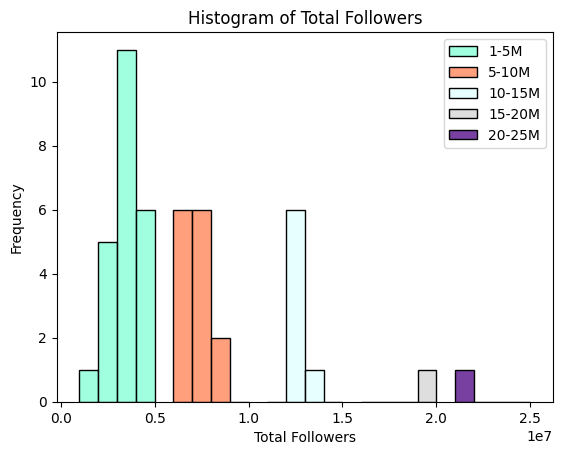

In [247]:
#I prefer starting with a histogram to know how the data is distributed and how should we divide our samples while investigating the reltion betweern followers and influncer activity on instagram
# Specify custom bins using numpy linspace
custom_bins = np.linspace(1e6, 25e6, num=25)

# Create a histogram with custom bins and different colors for different sections
ax = sns.histplot(df['Total Followers'], bins=custom_bins[:5], color='aquamarine', label='1-5M')
sns.histplot(df['Total Followers'], bins=custom_bins[5:10], color='coral', label='5-10M', ax=ax)
sns.histplot(df['Total Followers'], bins=custom_bins[10:15], color='lightcyan', label='10-15M', ax=ax)
sns.histplot(df['Total Followers'], bins=custom_bins[15:20], color='lightgrey', label='15-20M', ax=ax)
sns.histplot(df['Total Followers'], bins=custom_bins[20:], color="indigo", label='20-25M', ax=ax)

# Set labels and title
ax.set_xlabel("Total Followers")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of Total Followers")

# Add legend
ax.legend()

# Show the plot
plt.show()


From the histogram we can see a two outstanding influncers whom we should consider alone 

In [269]:
df_1_2=df.sort_values(by="Total Followers", ascending=False).head(2)
#Function for subplotting our numeric table to vizulize the data distribution
def subplotter (startindex,endindex,dataframe,plottype, **kwargs):
    plt.figure(figsize=(20,8))
    for index,name in enumerate(dataframe.columns[startindex:]):
        plt.subplot(2,3,index +1 )
        plt.title(f"distrbution of {name}")
        plottype(df[name], **kwargs)
        plt.tight_layout()


,Posts per Day,Posts per Week,Posts per Month,Total Posts,Engagement Rate,Total Followers,Average User Activity,Influncer_bio
Username,,,,,,,,
@yasmine_sabri,0.39,2.71,11.61,1200,0.92,21600000,61.22,Bio I DreamInstagram Handle @yasmine_sabriIns...
@hannahelzahed,0.15,1.04,4.44,1200,1.95,20000000,100.00,Bio Le meilleur est à venir Yara...


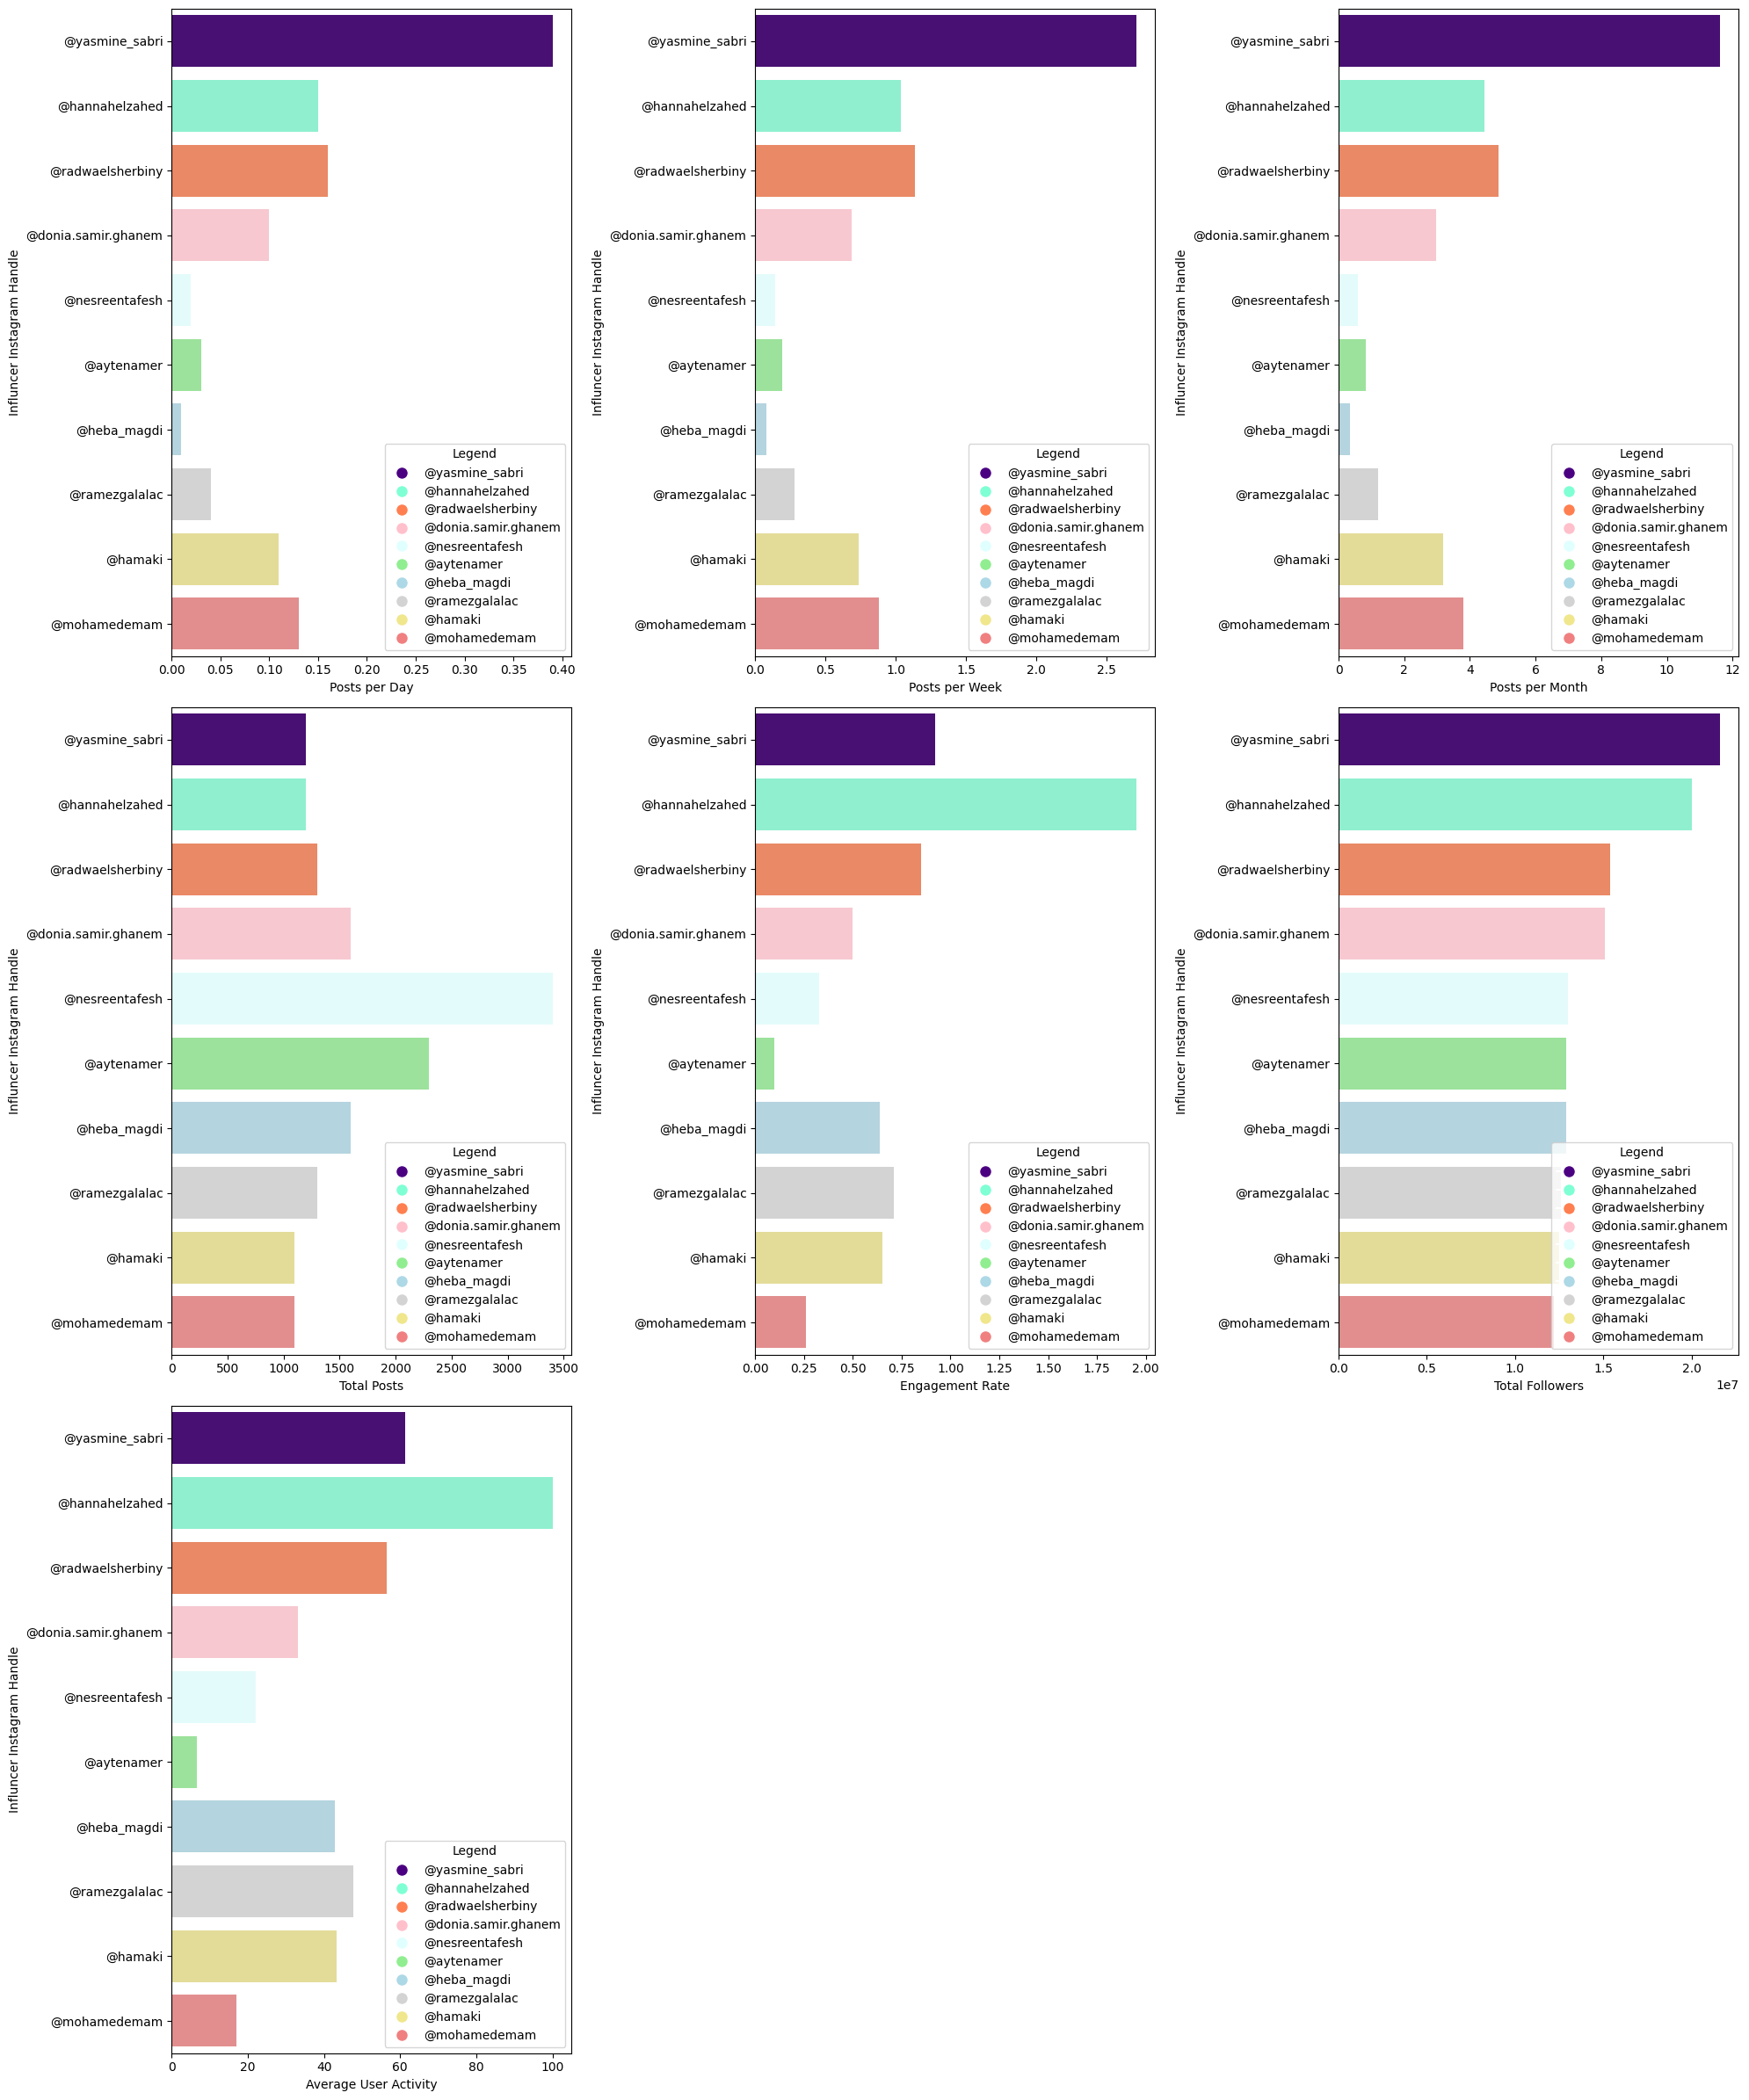

In [257]:
def plotter(startindex,endindex,dataframe,leg_loc):

    plt.figure(figsize=(20,24))
    for index,name in enumerate(dataframe.columns[startindex:endindex]):
        plt.subplot(3,3,index +1 )
        # Specify custom colors for each bar
        colors = ["indigo", "aquamarine", "coral", "pink", "lightcyan",
                "lightgreen", "lightblue", "lightgrey", "khaki", "lightcoral"]
        # Create a bar plot with a custom color palette
        sns.barplot(x=dataframe[name], y=dataframe.index, data=dataframe, palette=colors, hue=dataframe.index)
        # Set the y-axis label
        plt.ylabel("Influncer Instagram Handle")
        plt.xlabel(f"{name}")
        # Create a custom legend outside the plot
        legend_labels = dataframe.index
        handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
        plt.legend(handles, legend_labels, title='Legend', loc=leg_loc)
        plt.tight_layout()

plotter(0,7,df_list[0],'lower right')

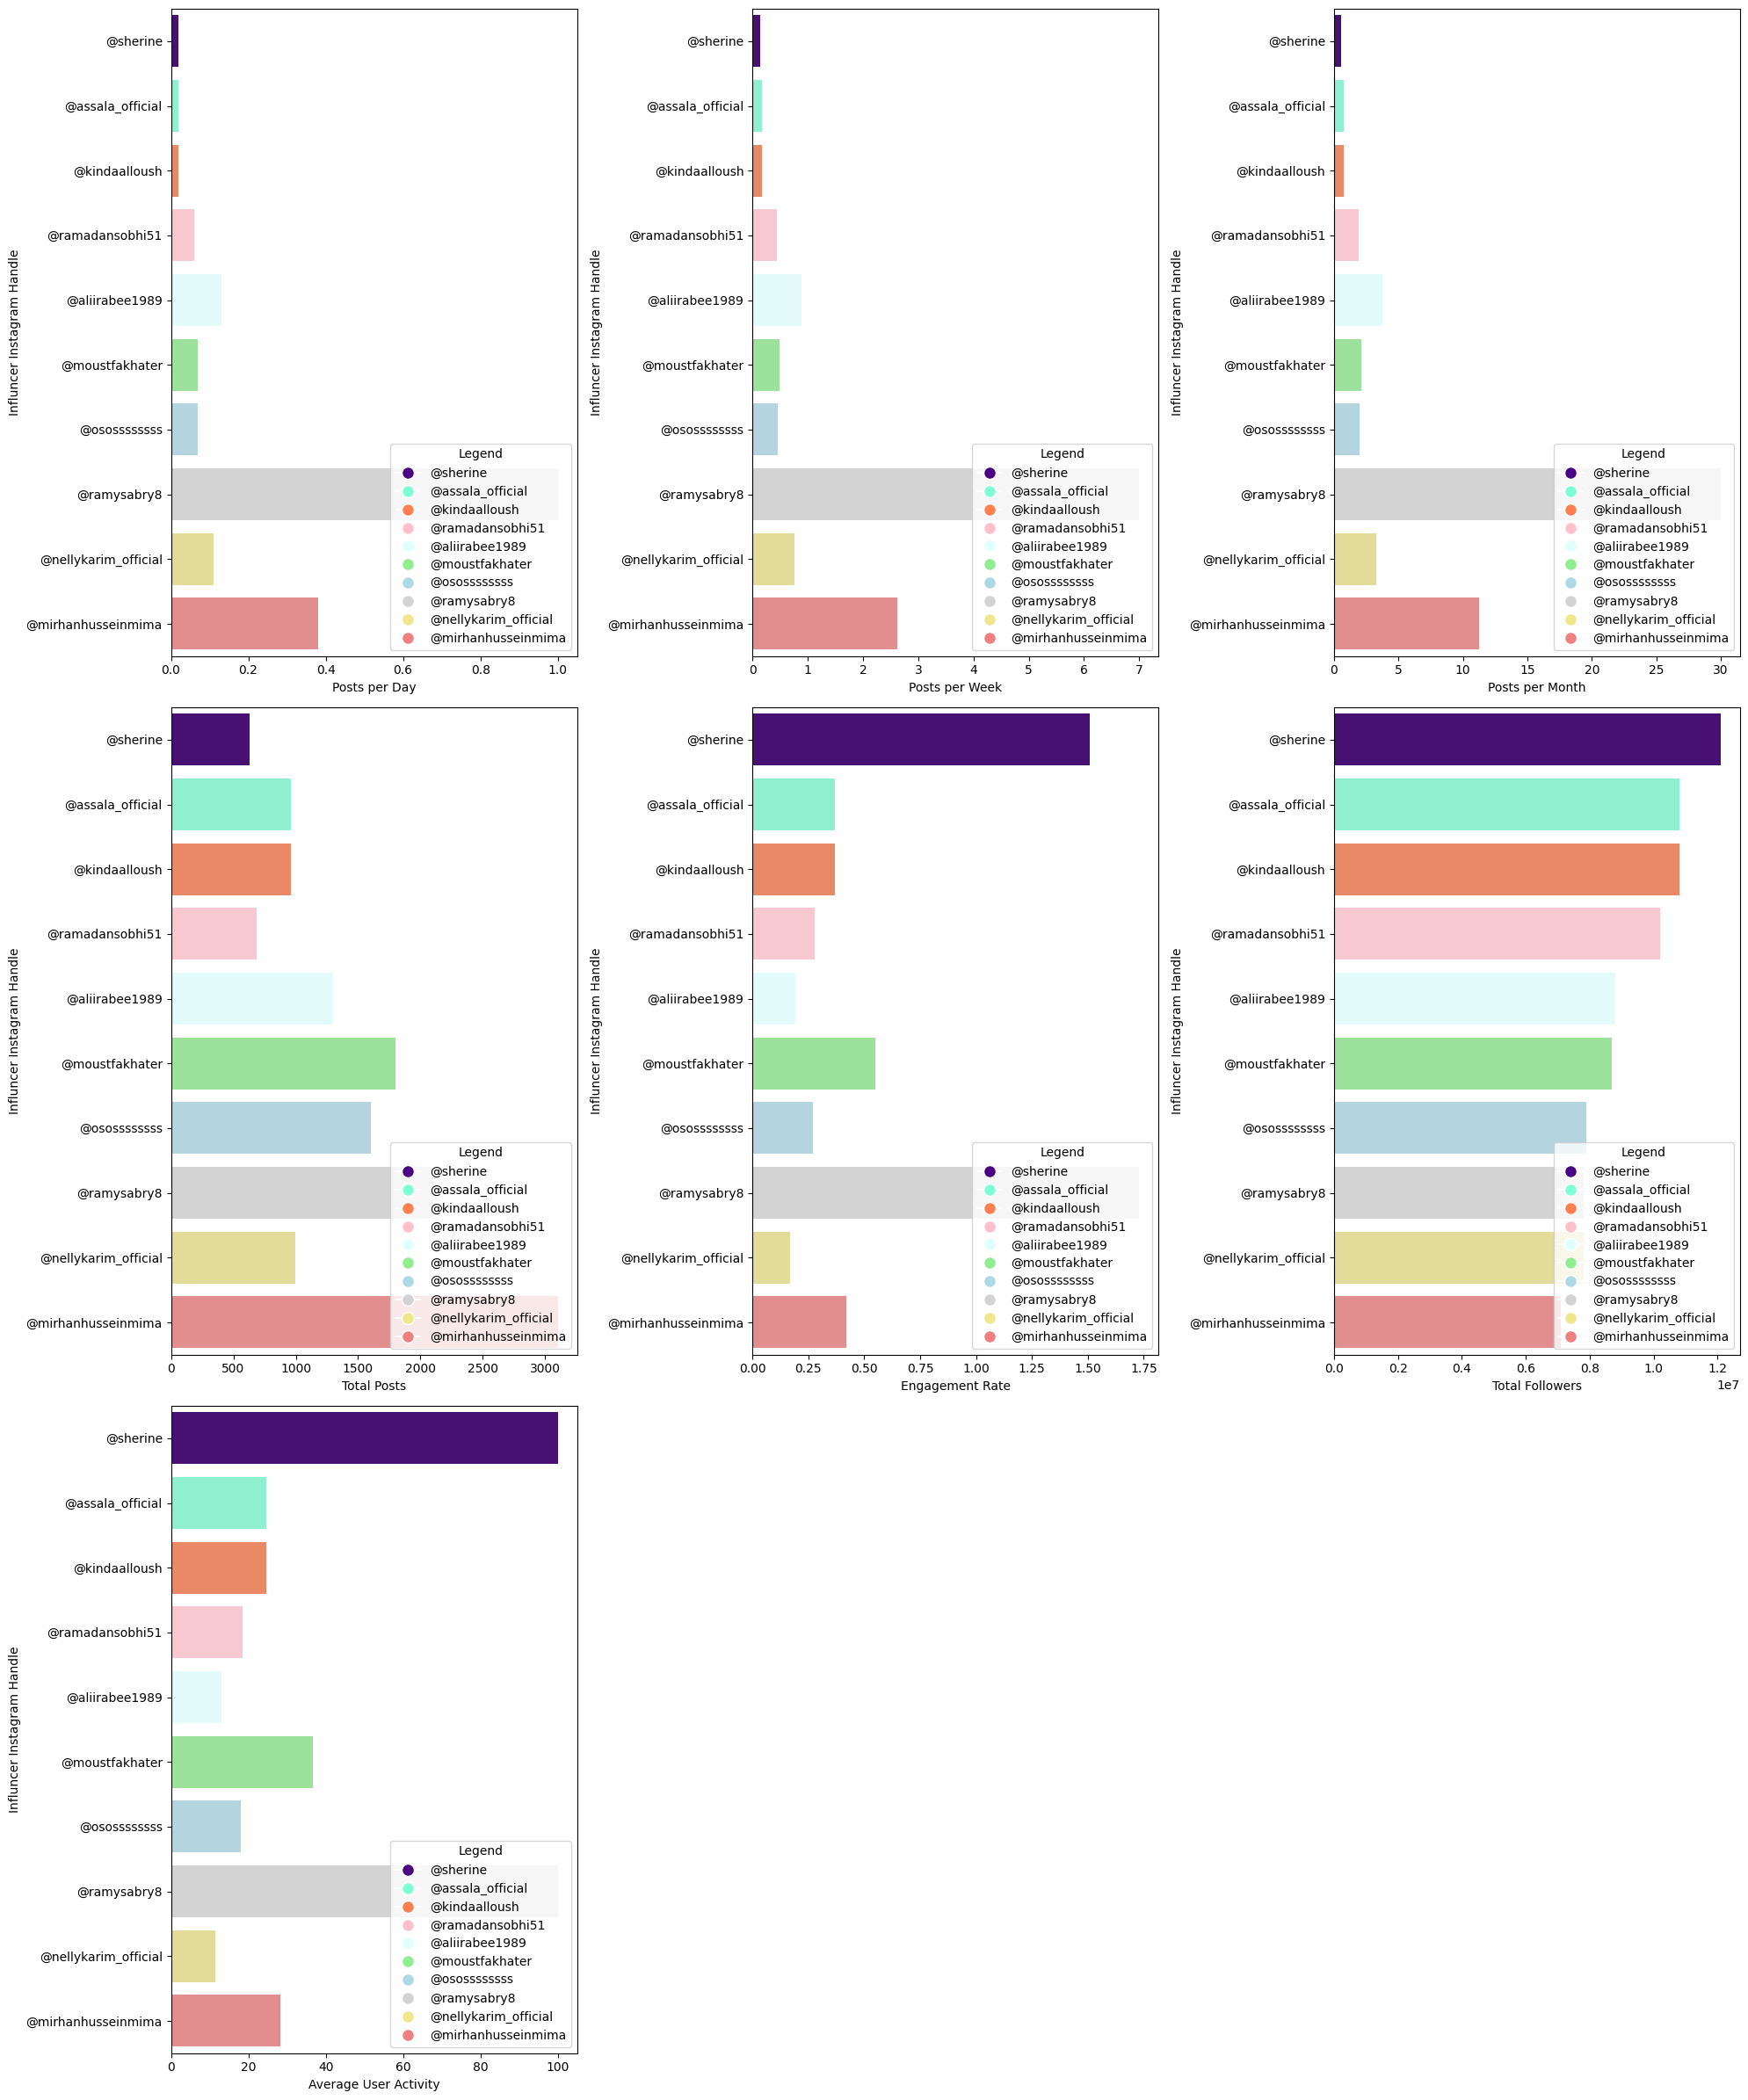

In [258]:
plotter(0,7,df_list[1],'lower right')


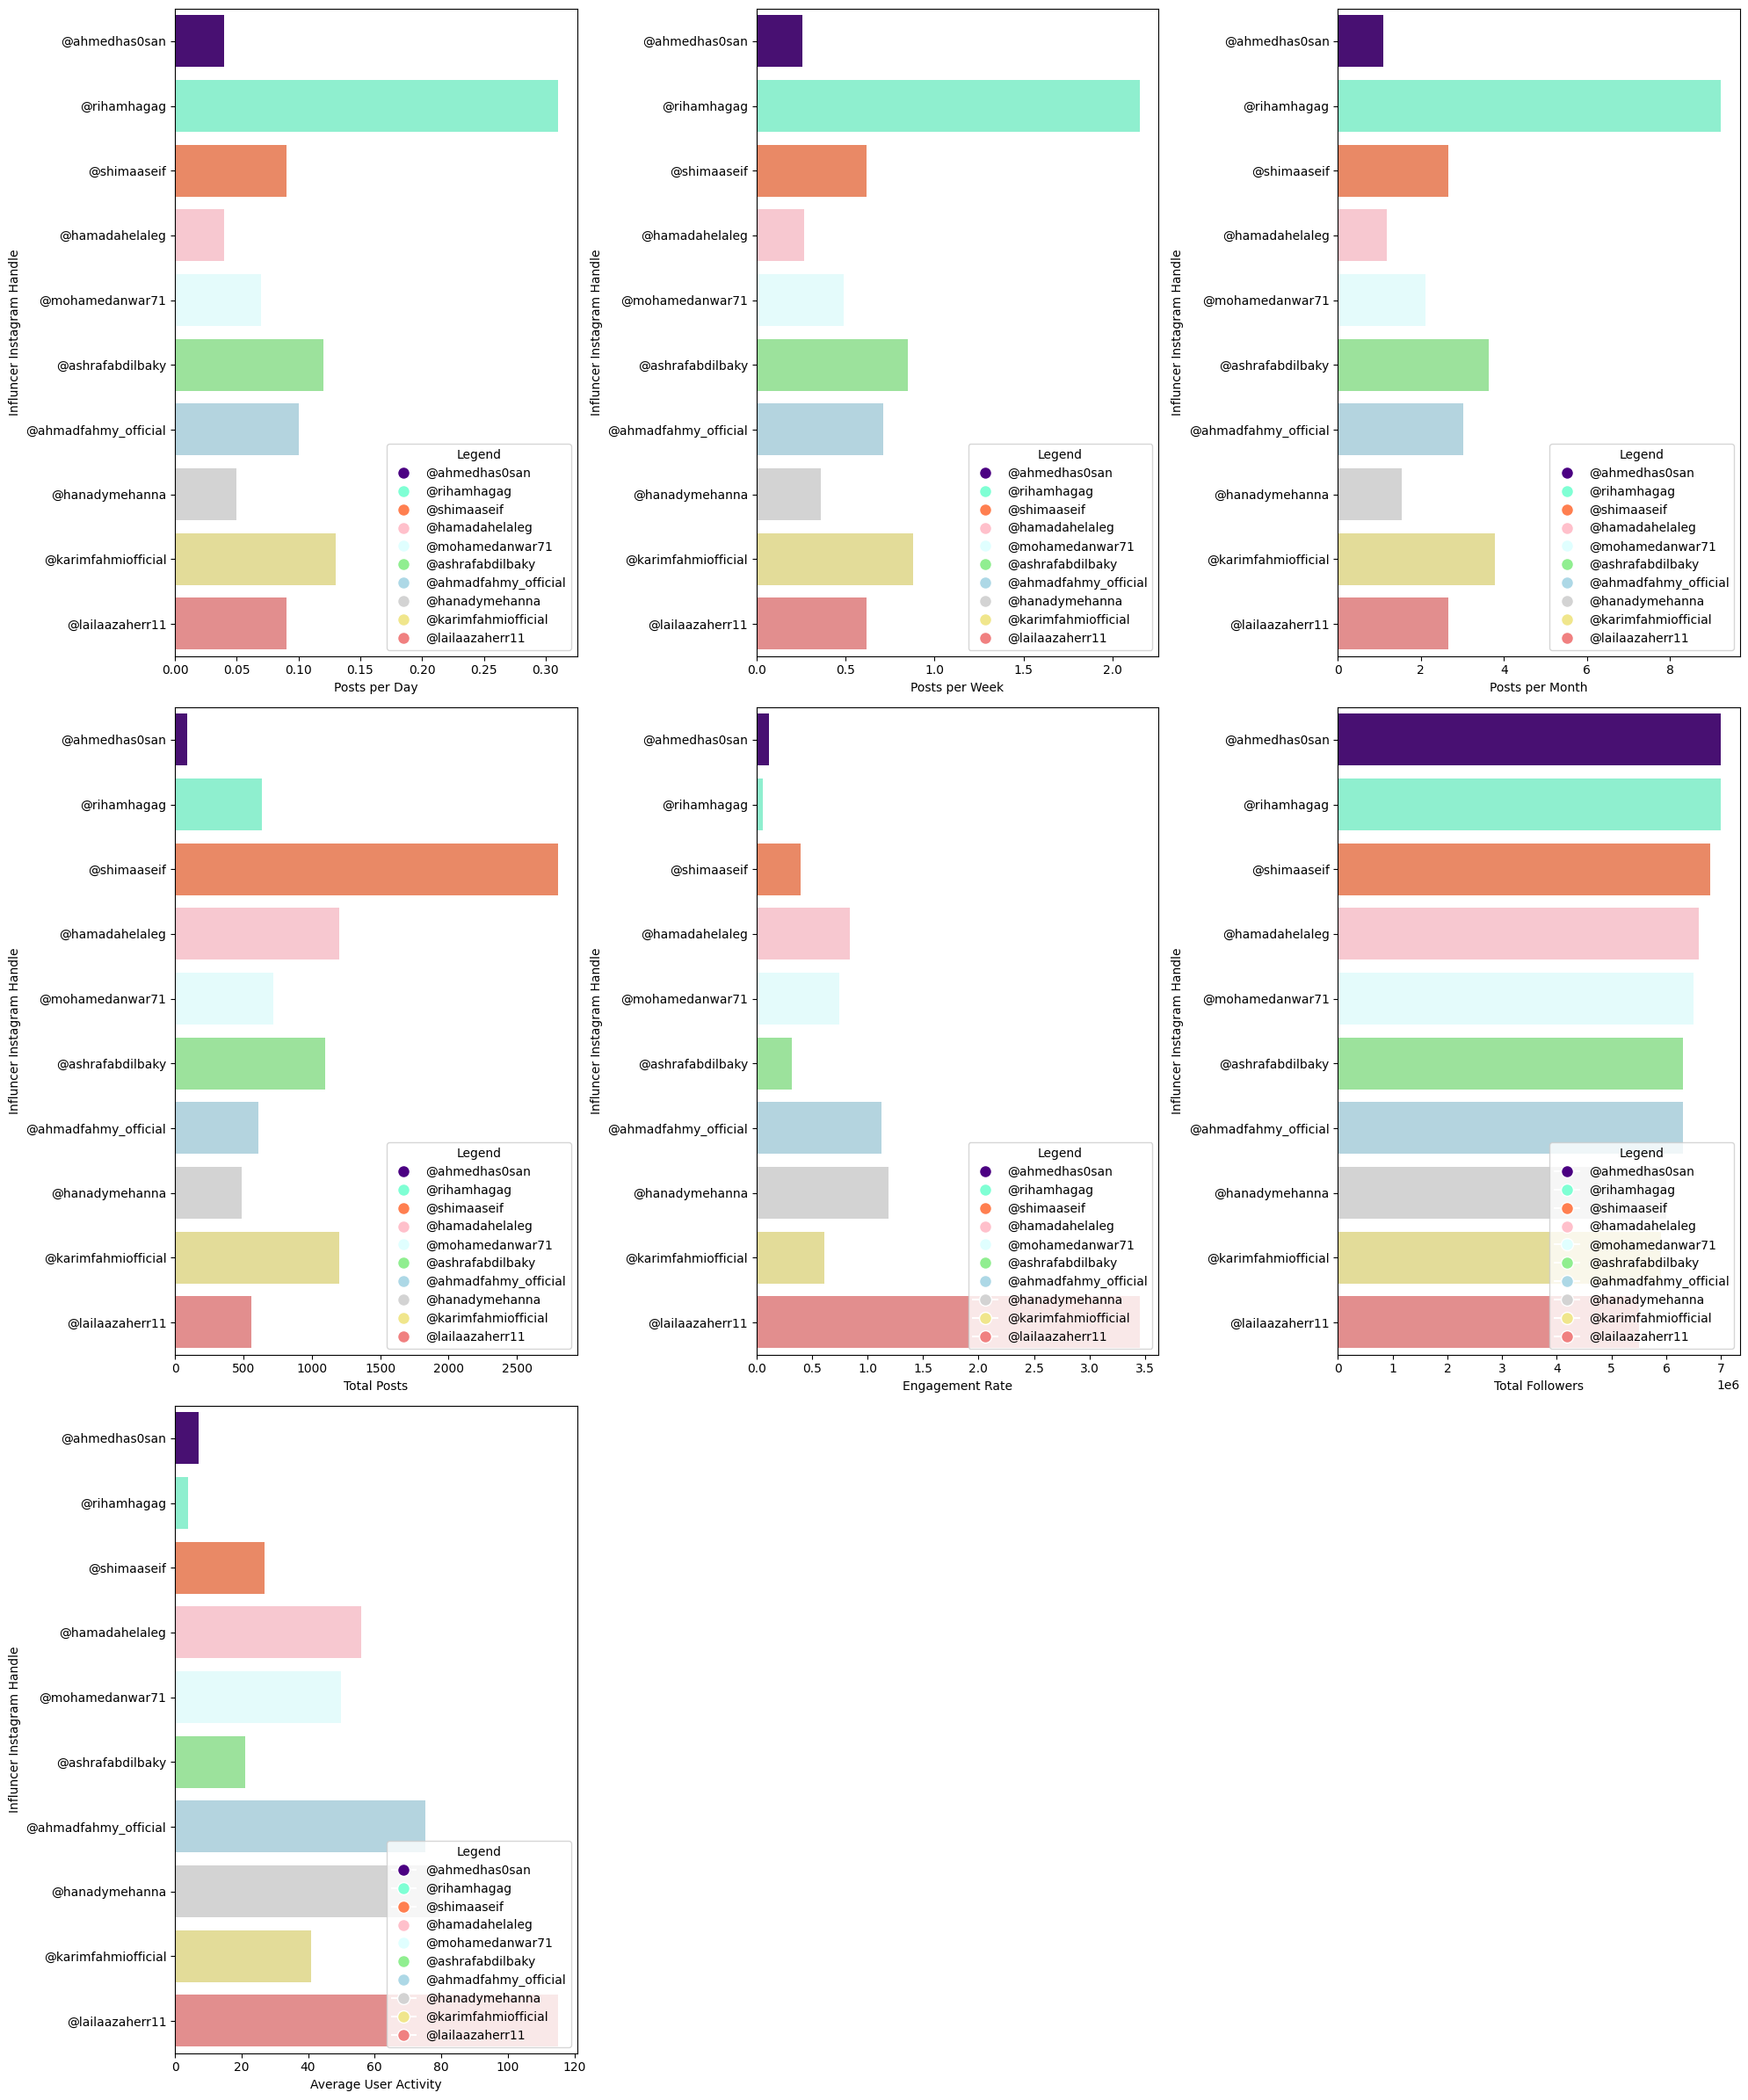

In [259]:
plotter(0,7,df_list[2],'lower right')

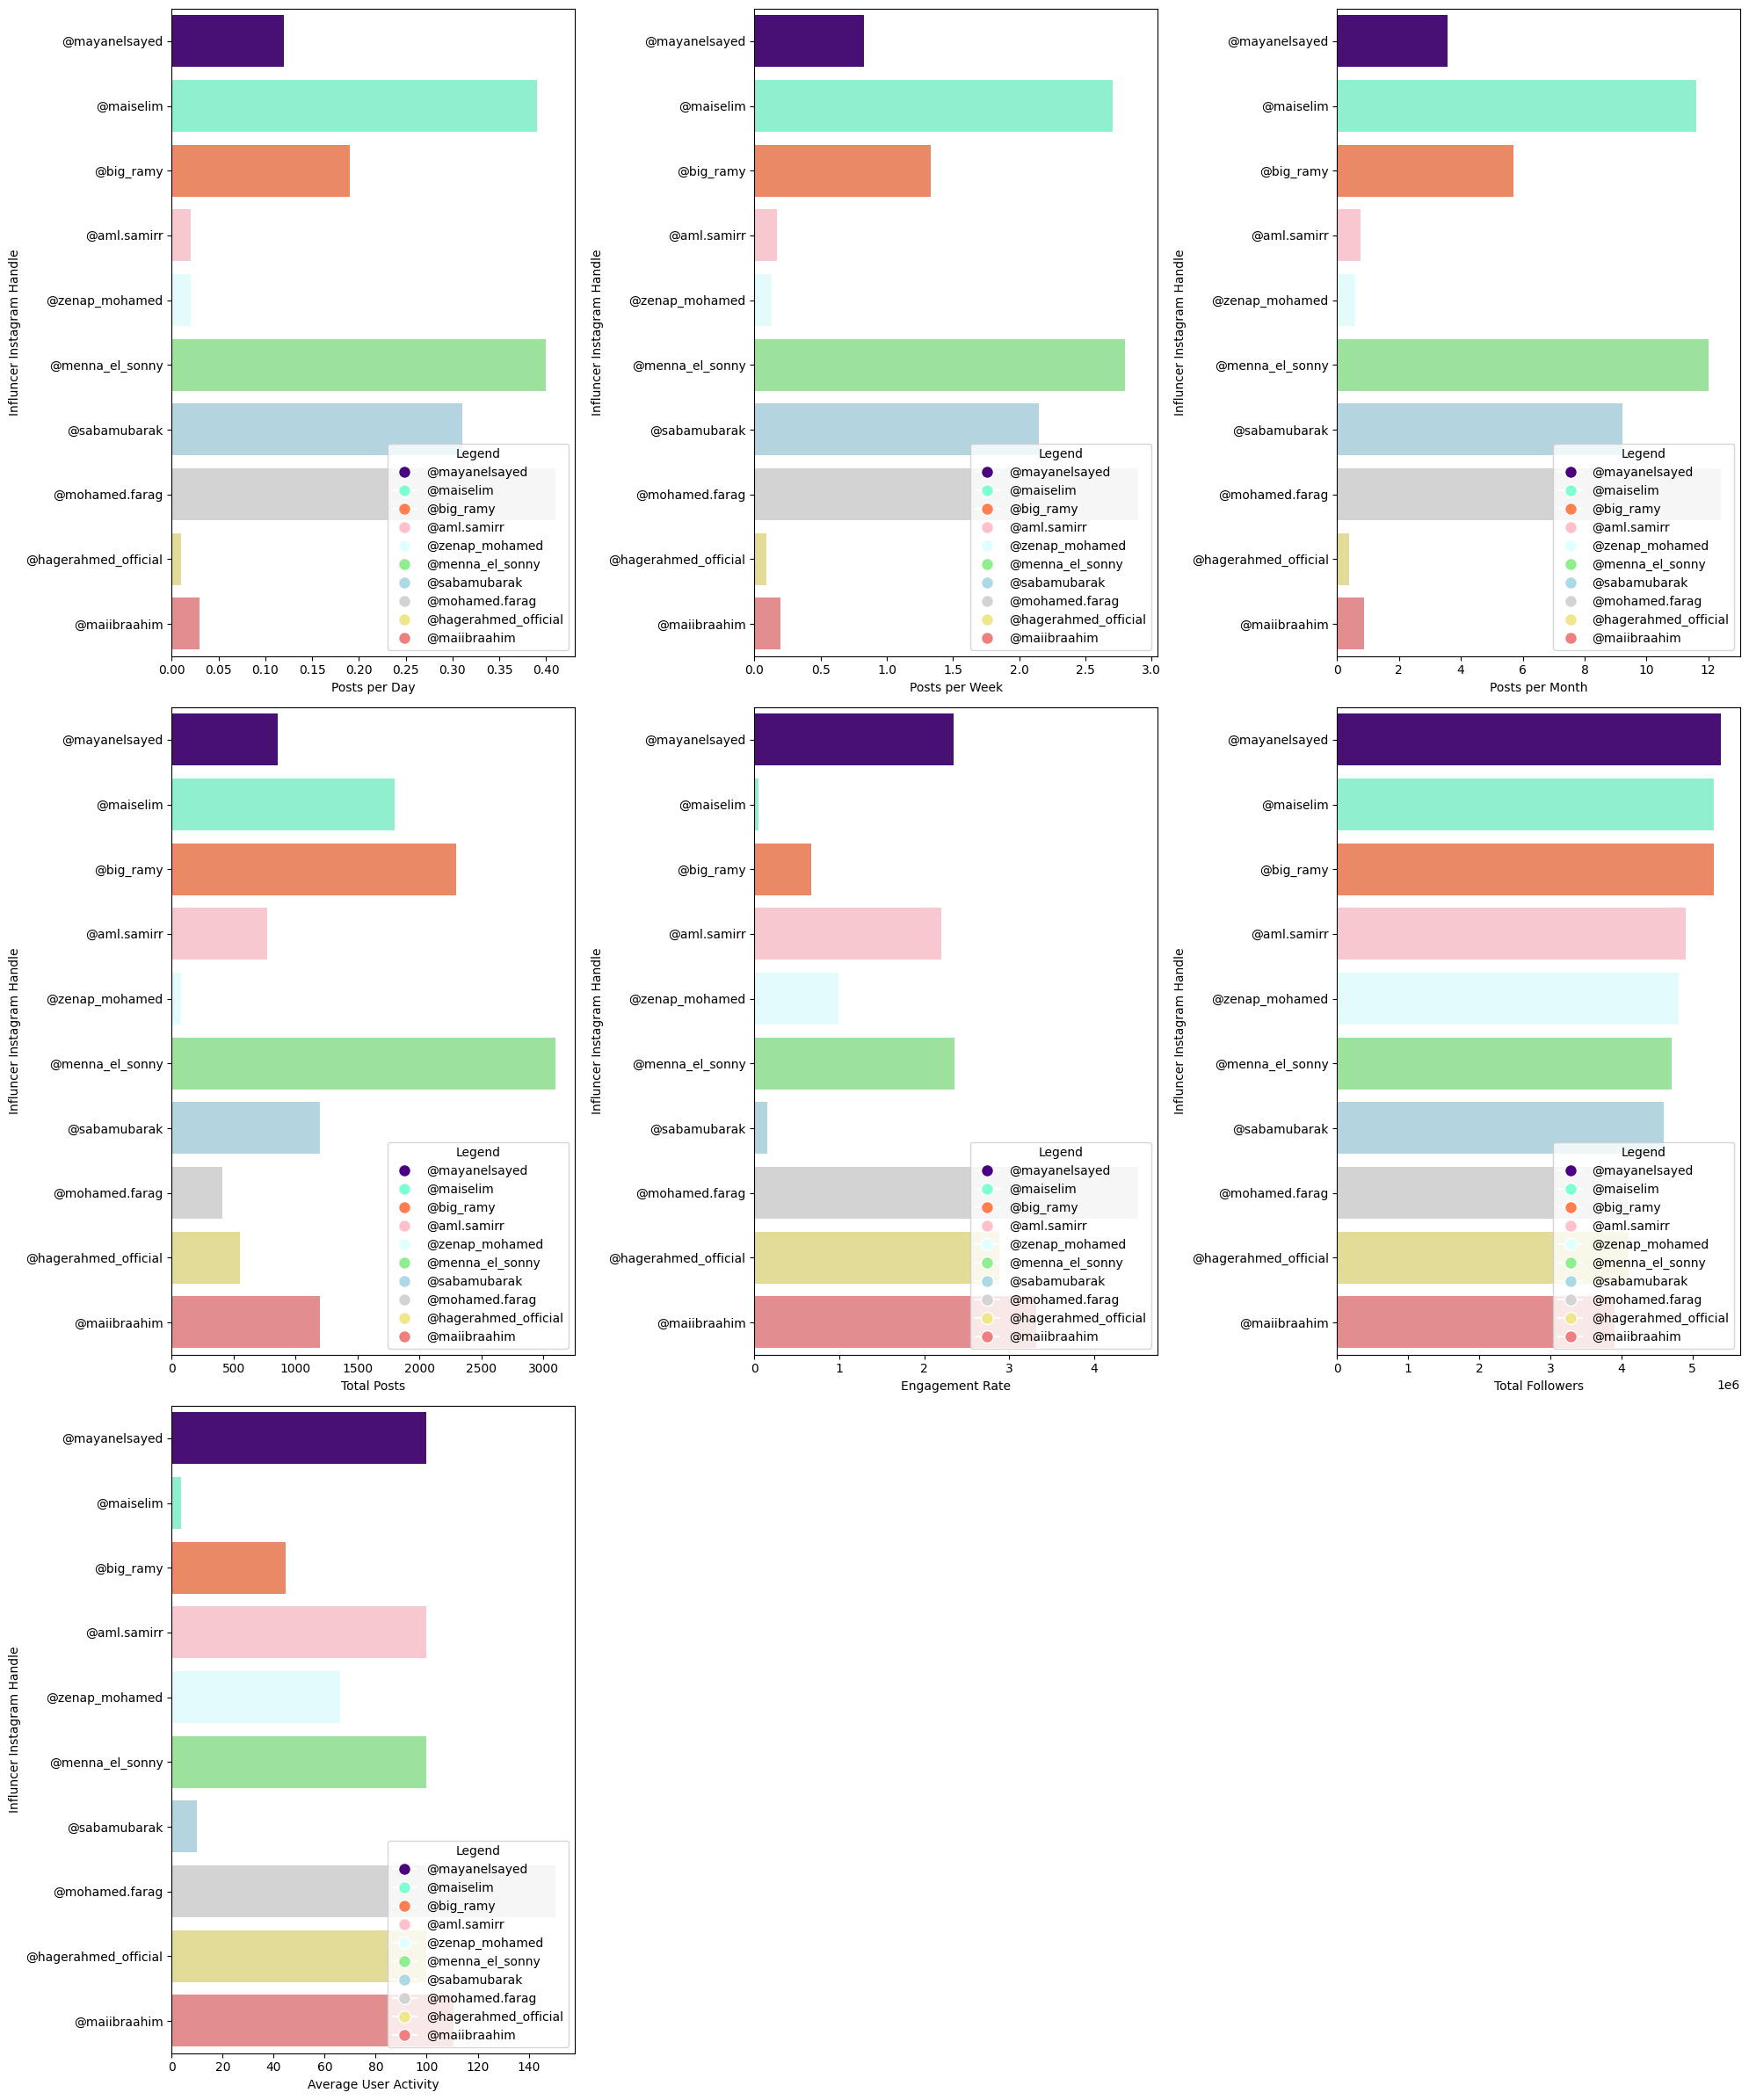

In [260]:
plotter(0,7,df_list[3],'lower right')

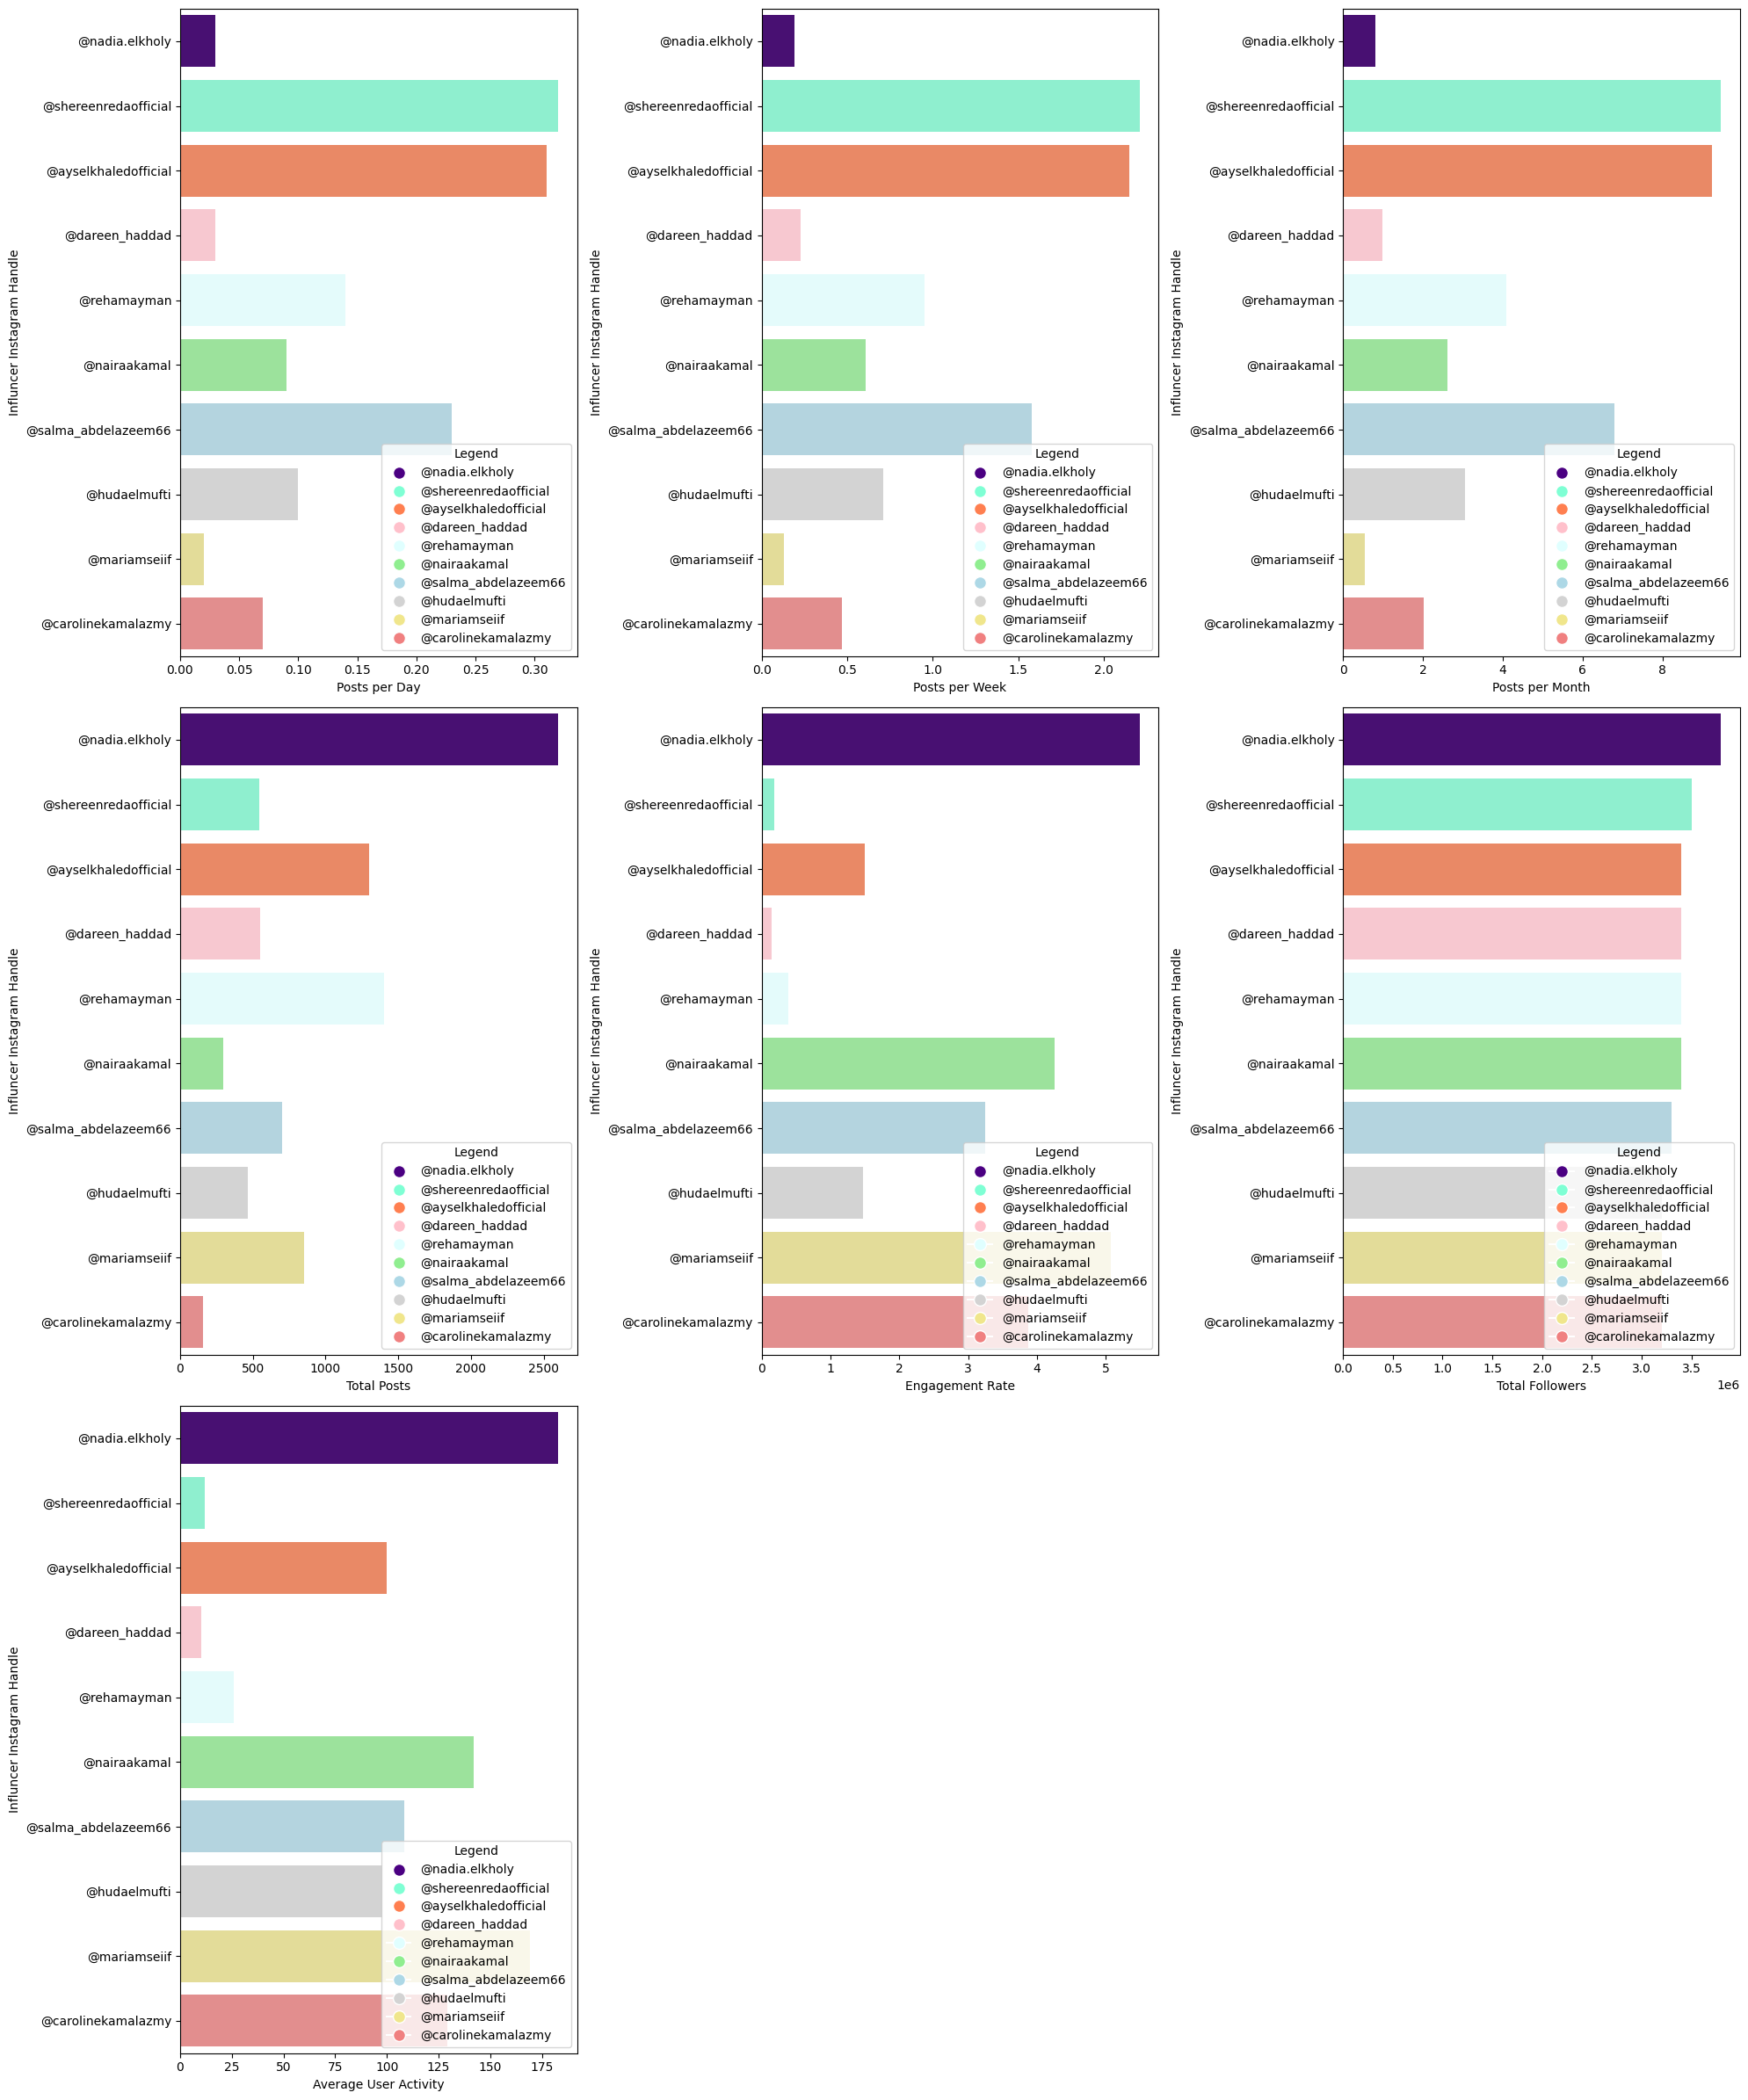

In [261]:
plotter(0,7,df_list[4],'lower right')

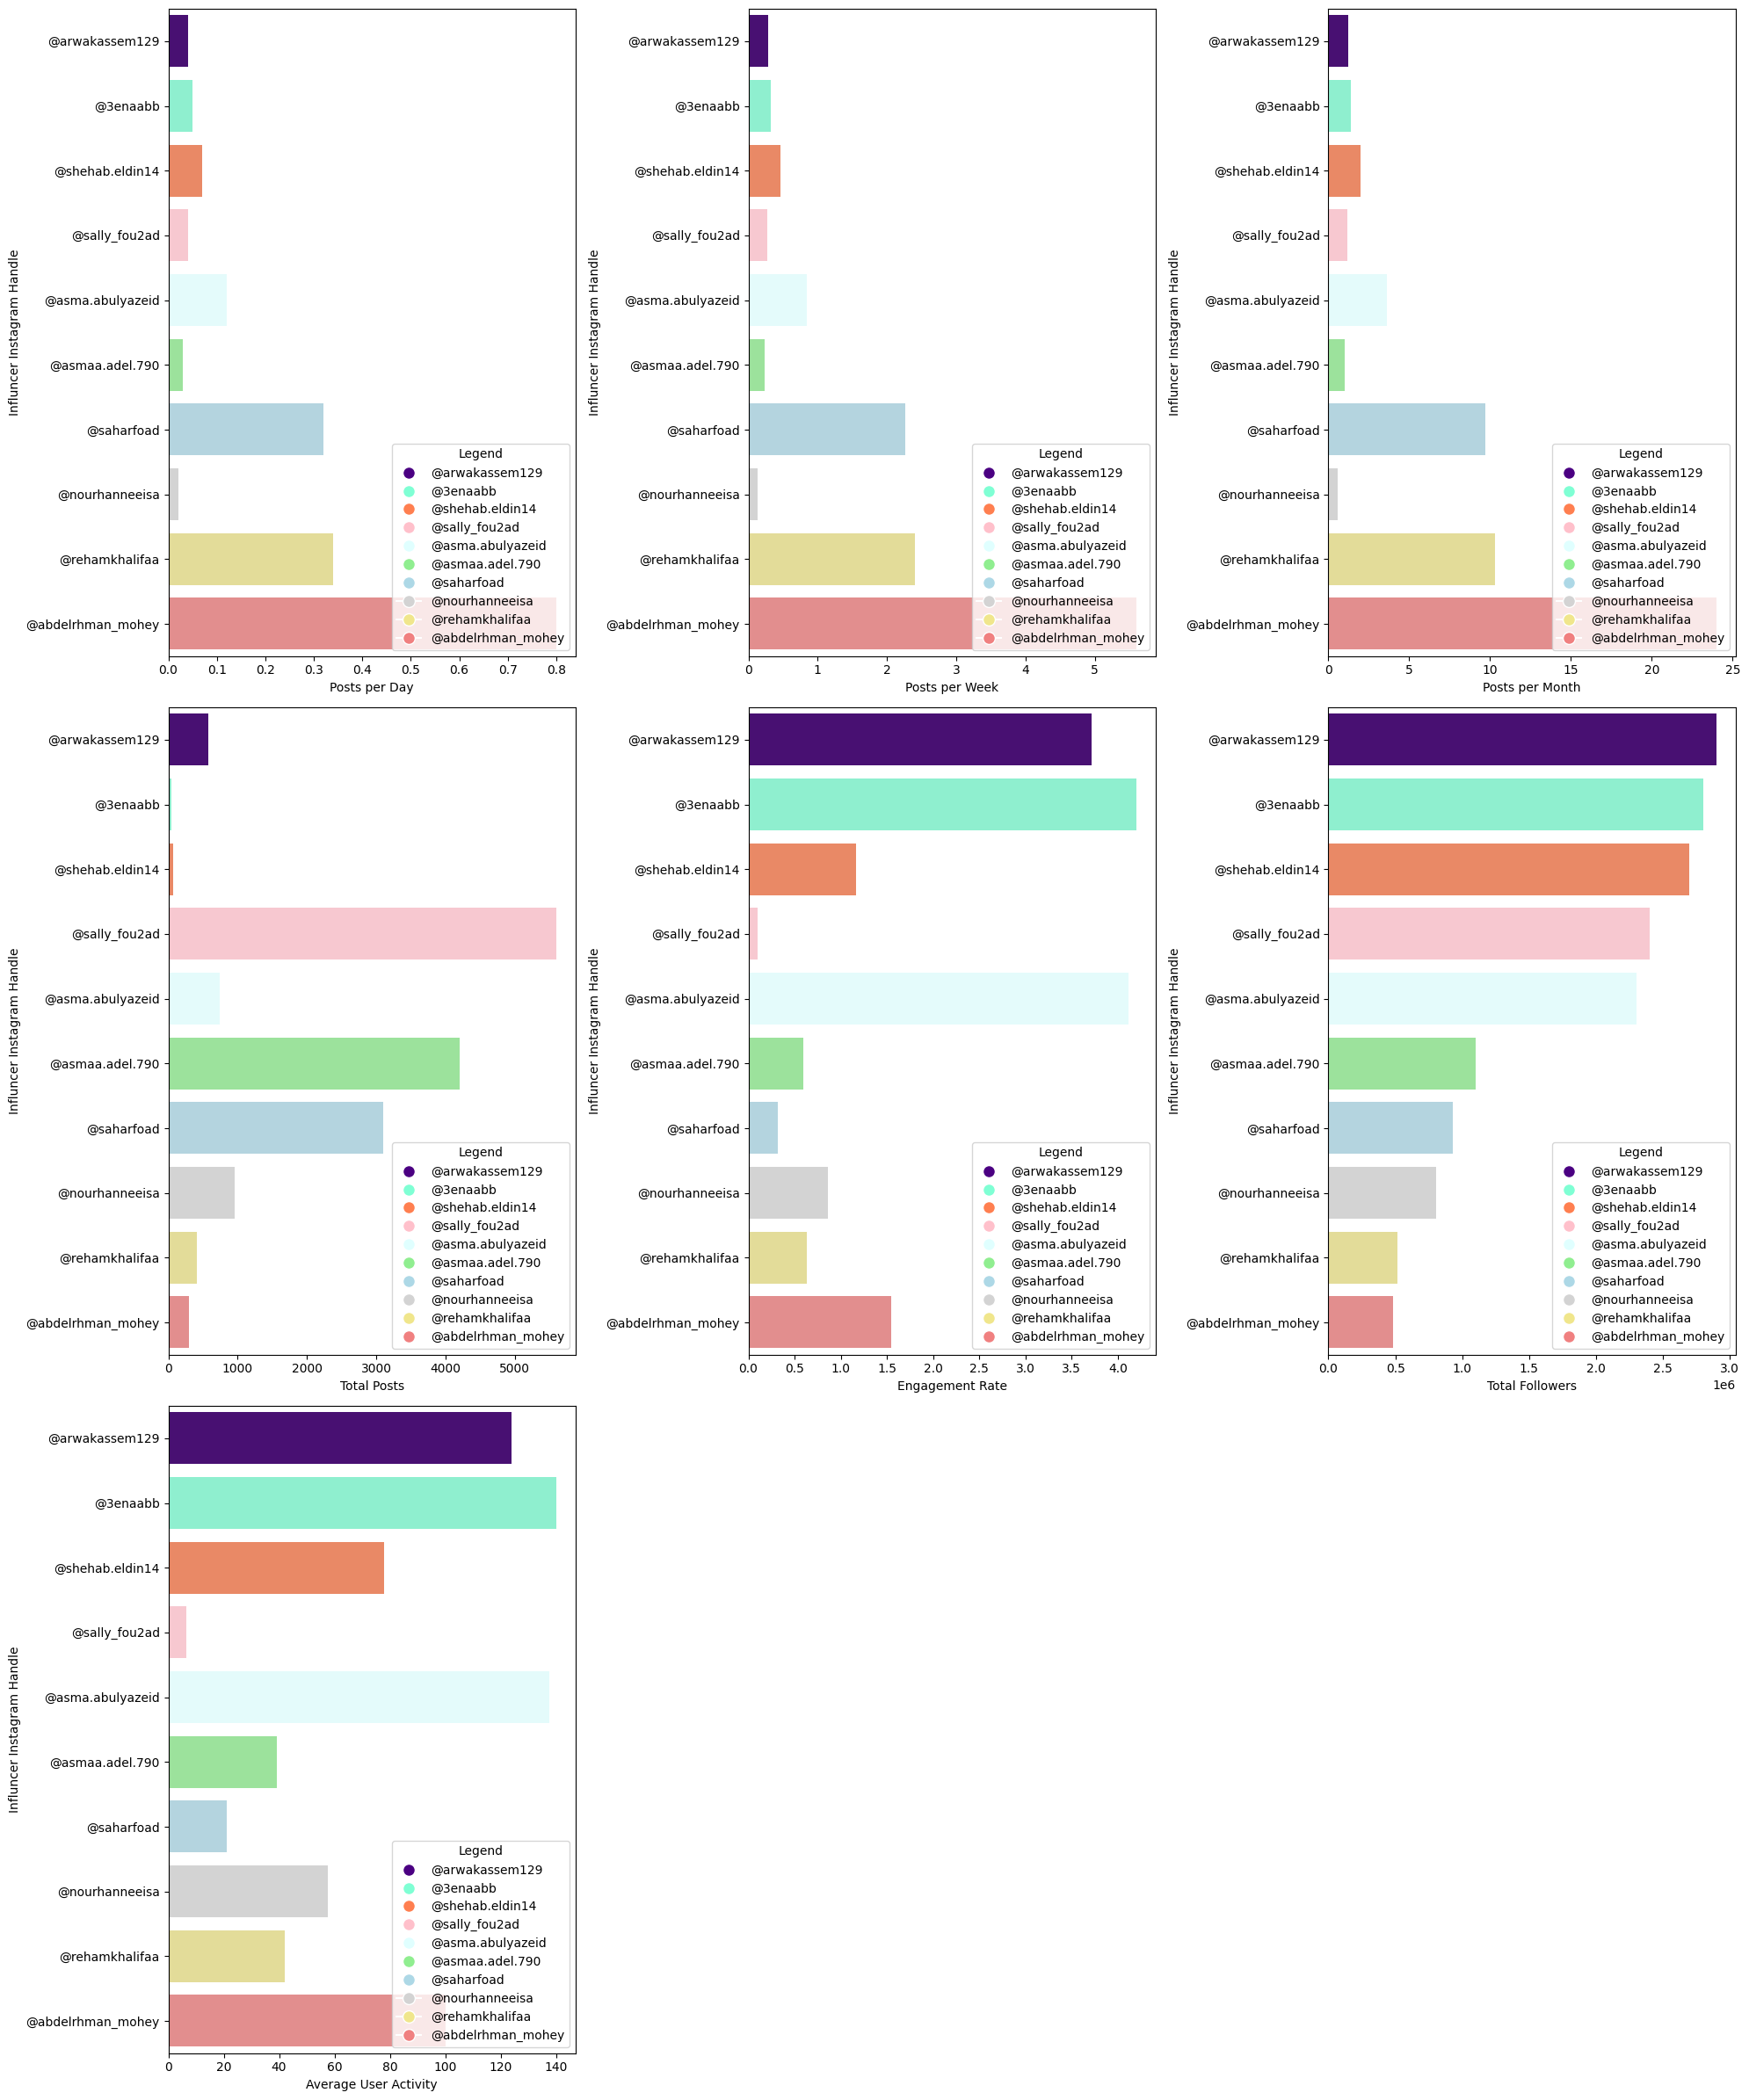

In [262]:
plotter(0,7,df_list[5],'lower right')

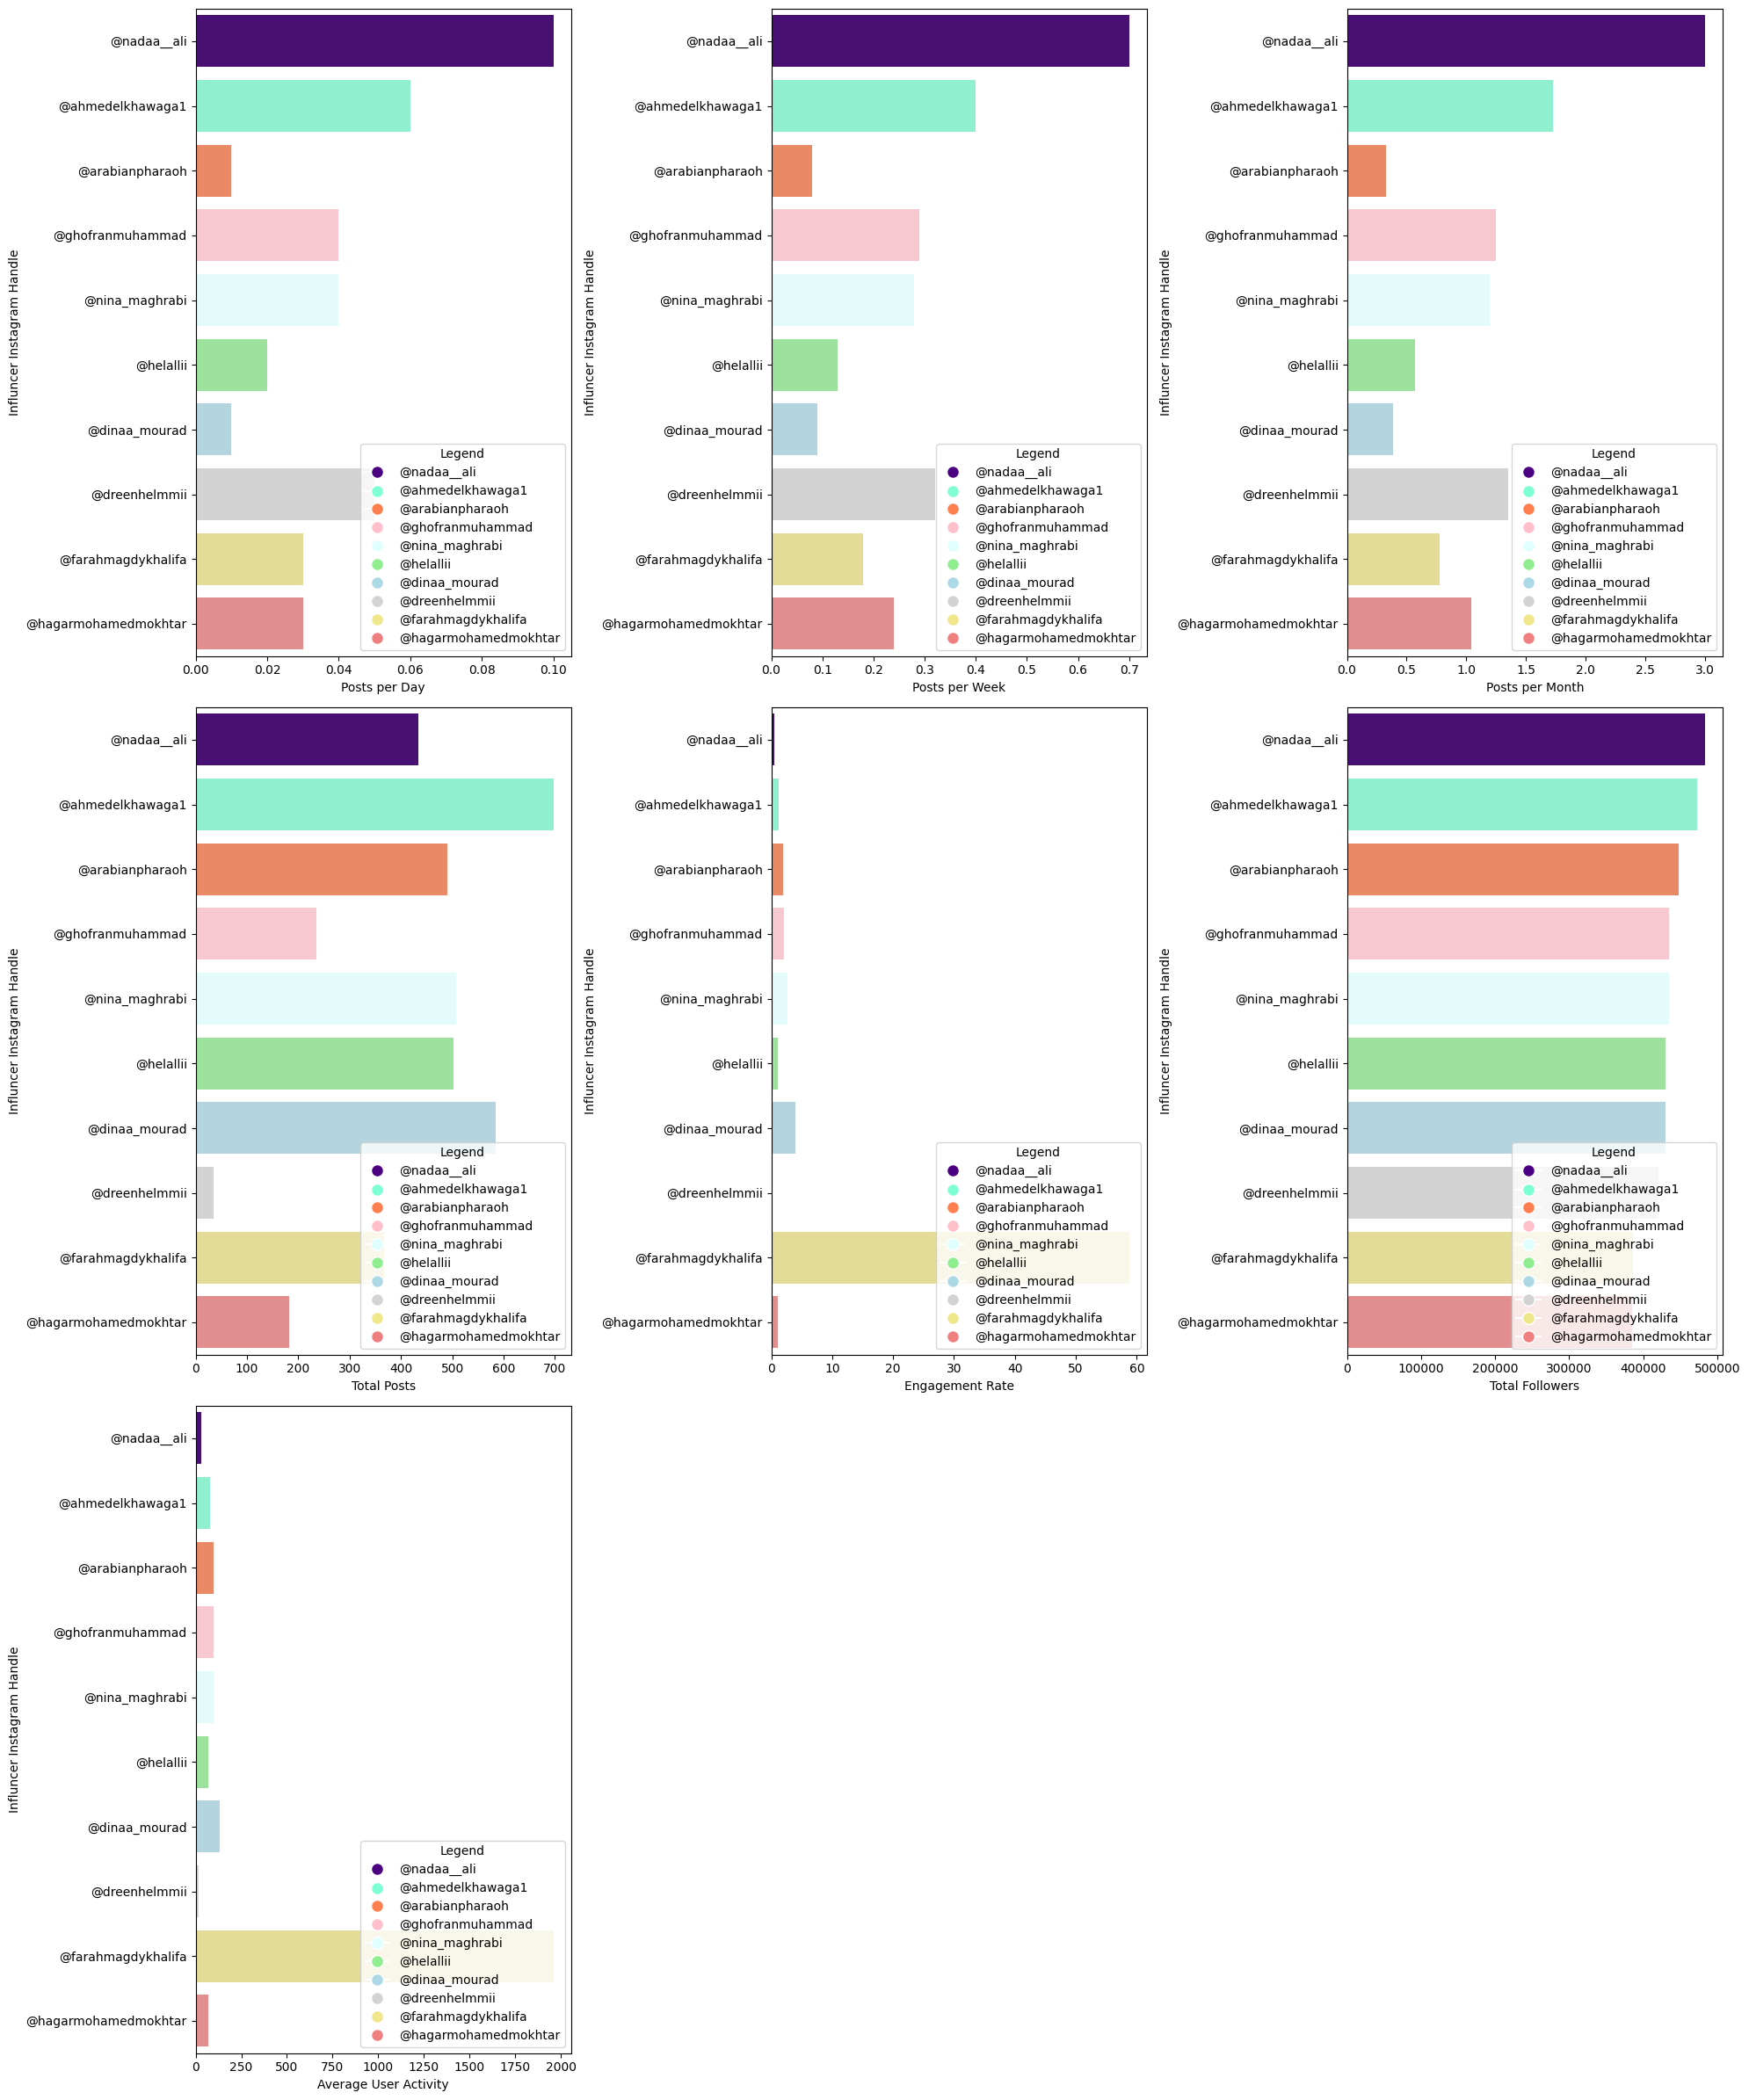

In [263]:
plotter(0,7,df_list[6],'lower right')

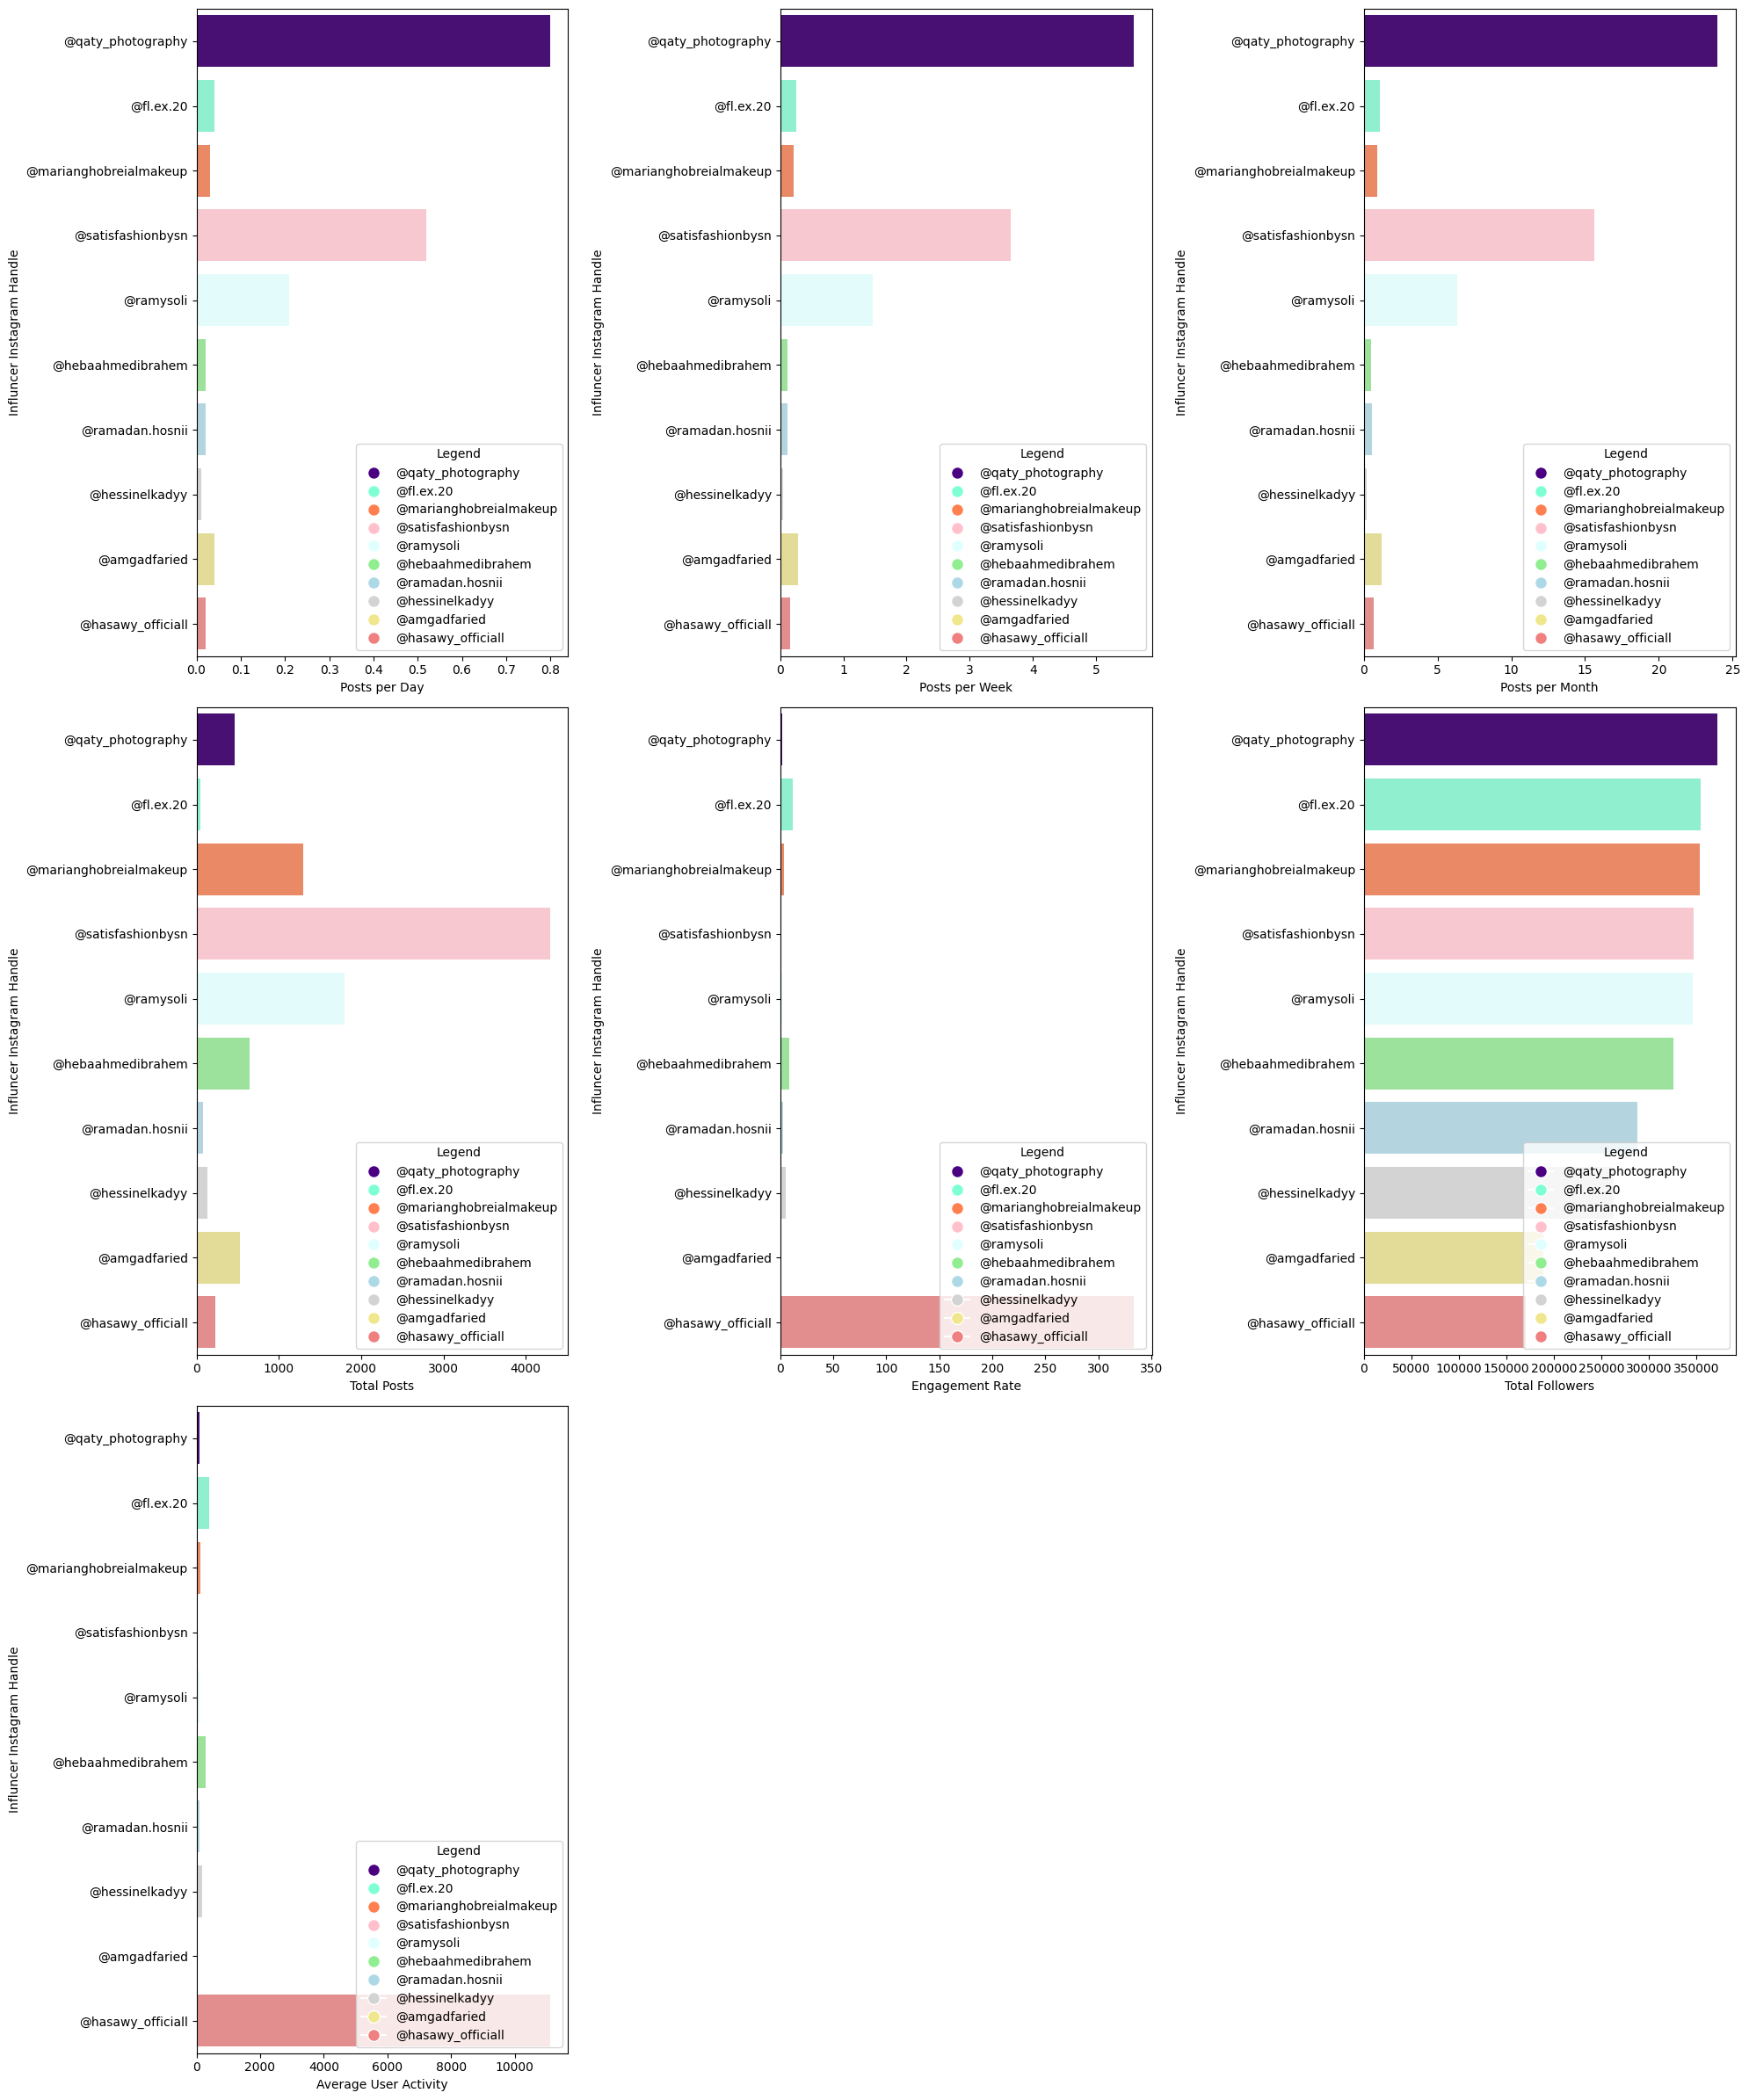

In [264]:
plotter(0,7,df_list[7],'lower right')

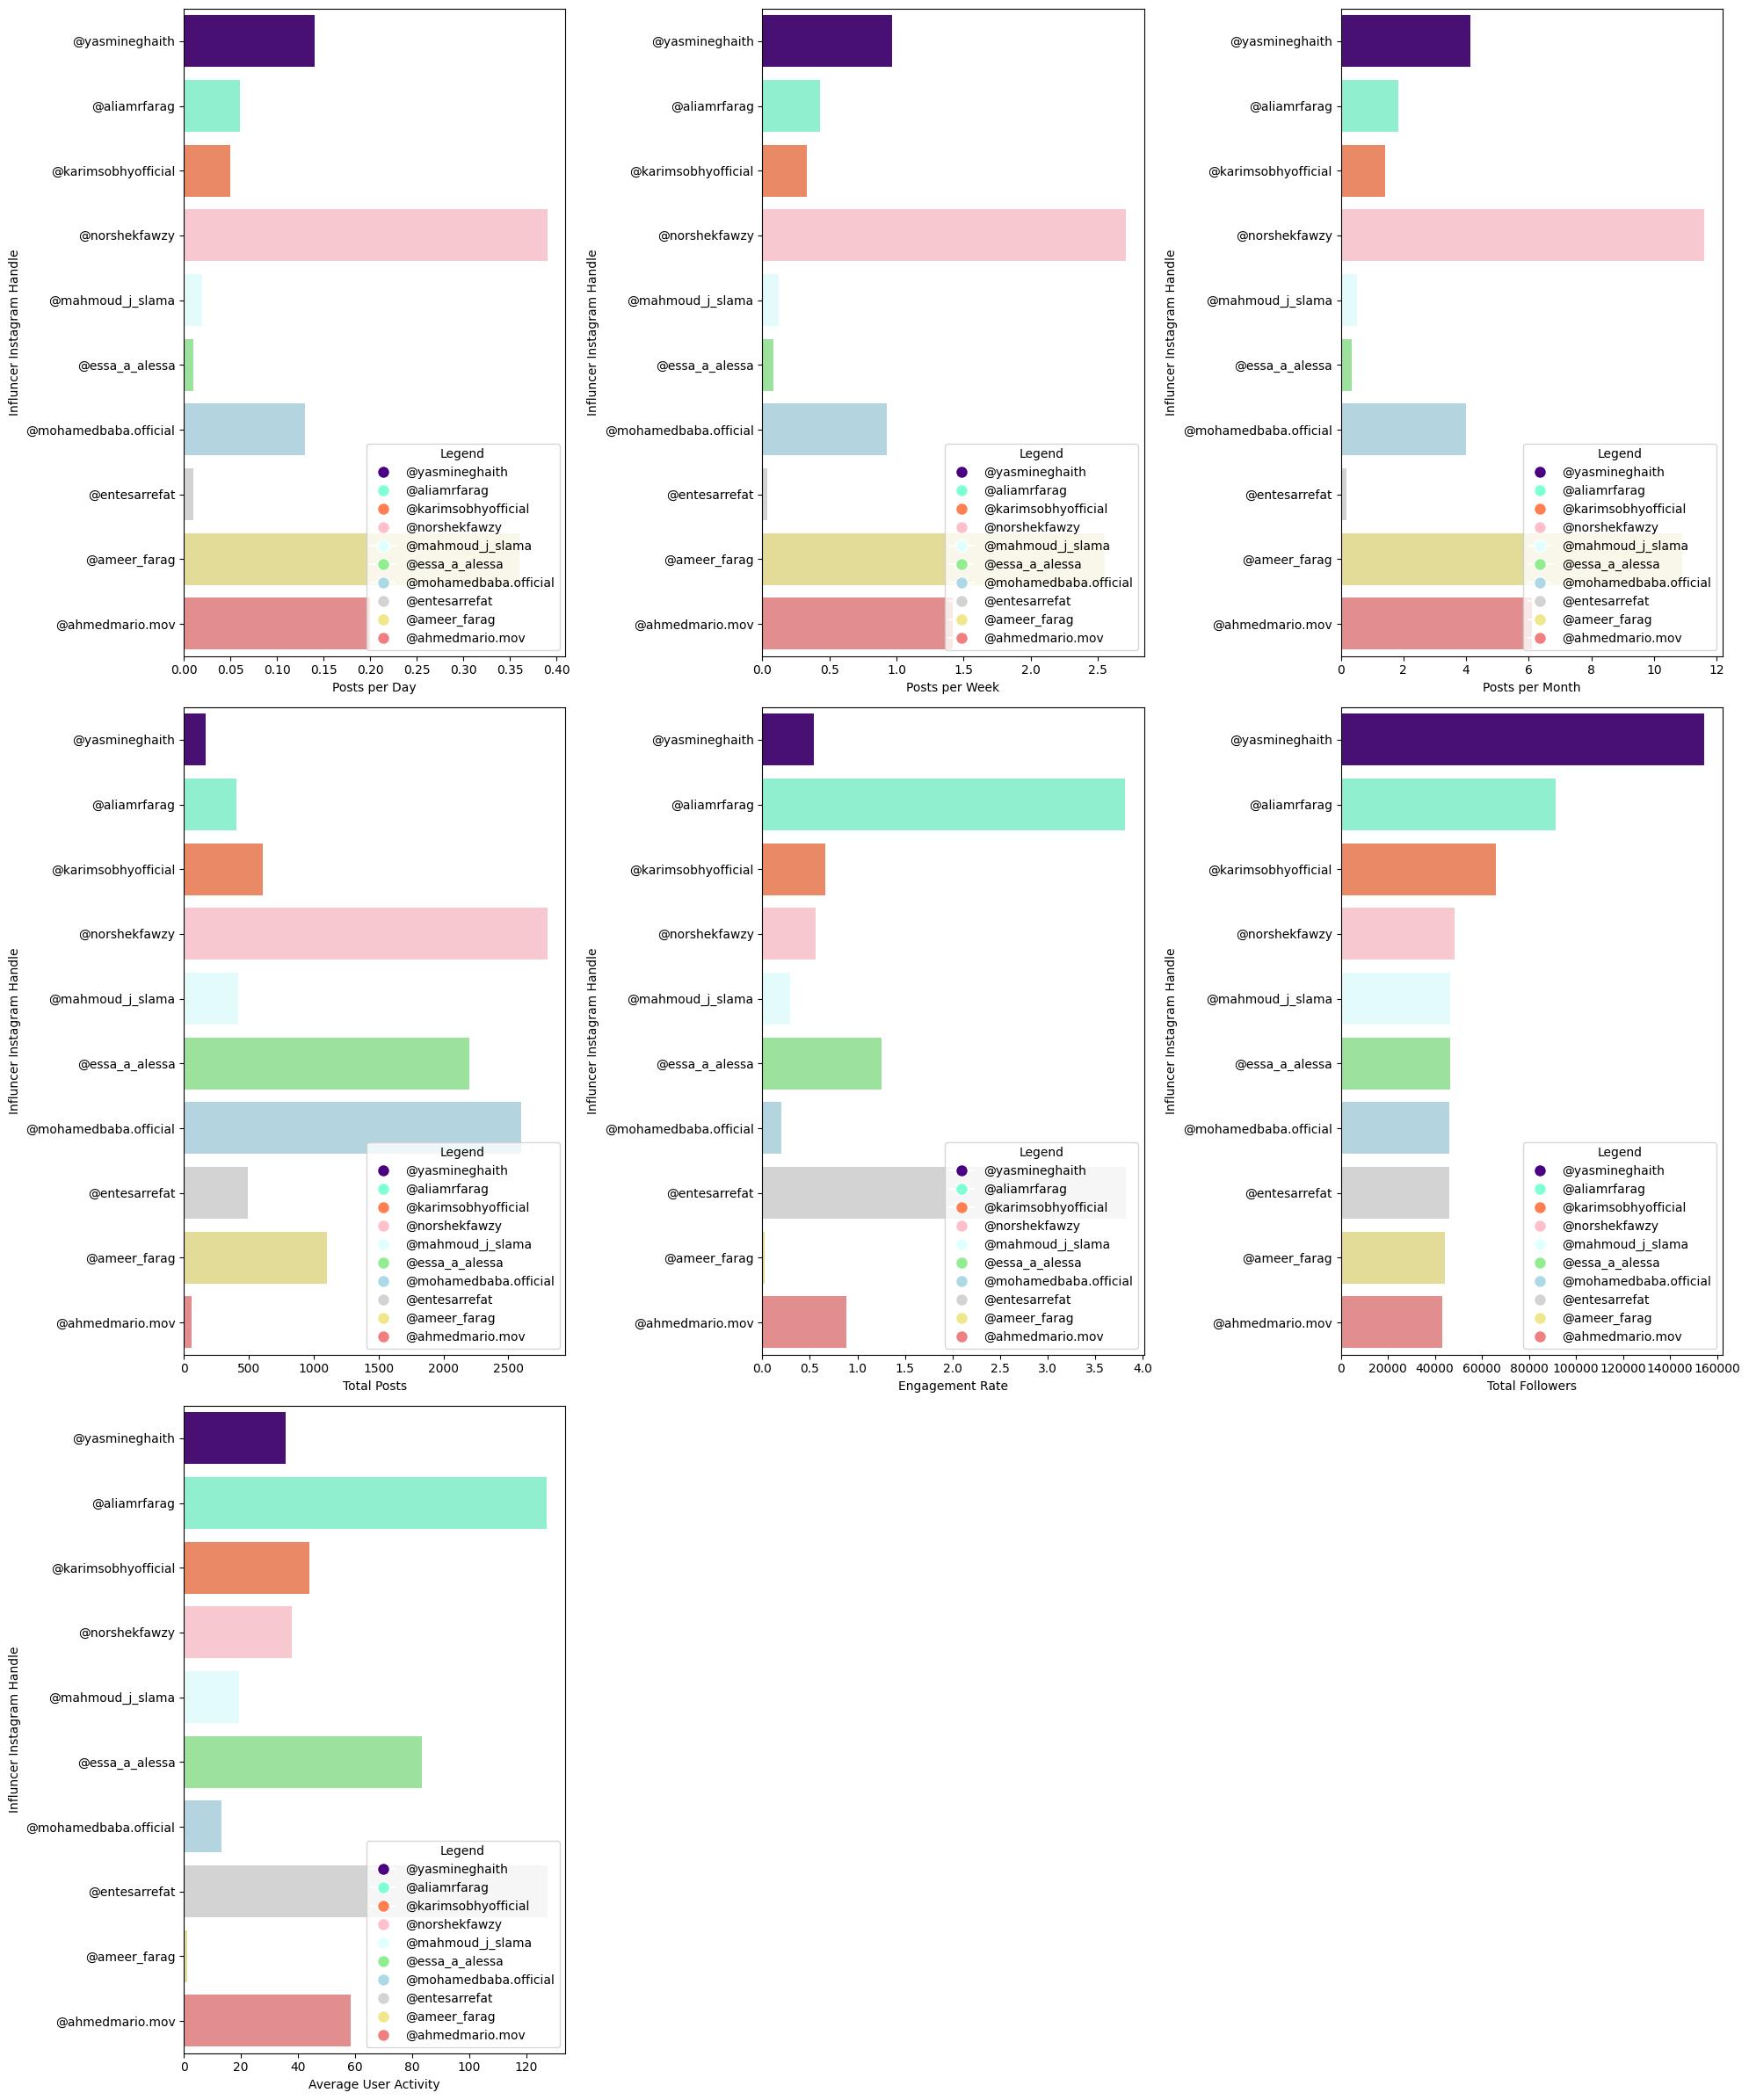

In [265]:
plotter(0,7,df_list[8],'lower right')

C:\Users\CompuMax\AppData\Local\Temp\ipykernel_11452\1254534020.py:10: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=dataframe[name], y=dataframe.index, data=dataframe, palette=colors, hue=dataframe.index)
C:\Users\CompuMax\AppData\Local\Temp\ipykernel_11452\1254534020.py:10: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=dataframe[name], y=dataframe.index, data=dataframe, palette=colors, hue=dataframe.index)
C:\Users\CompuMax\AppData\Local\Temp\ipykernel_11452\1254534020.py:10: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=dataframe[name], y=dataframe.index, data=dataframe, palette=colors, hue=dataframe.index)
C:\Users\CompuMax\AppData\Local\Temp\ipykernel_11452\1254534020.py:10: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=dataf

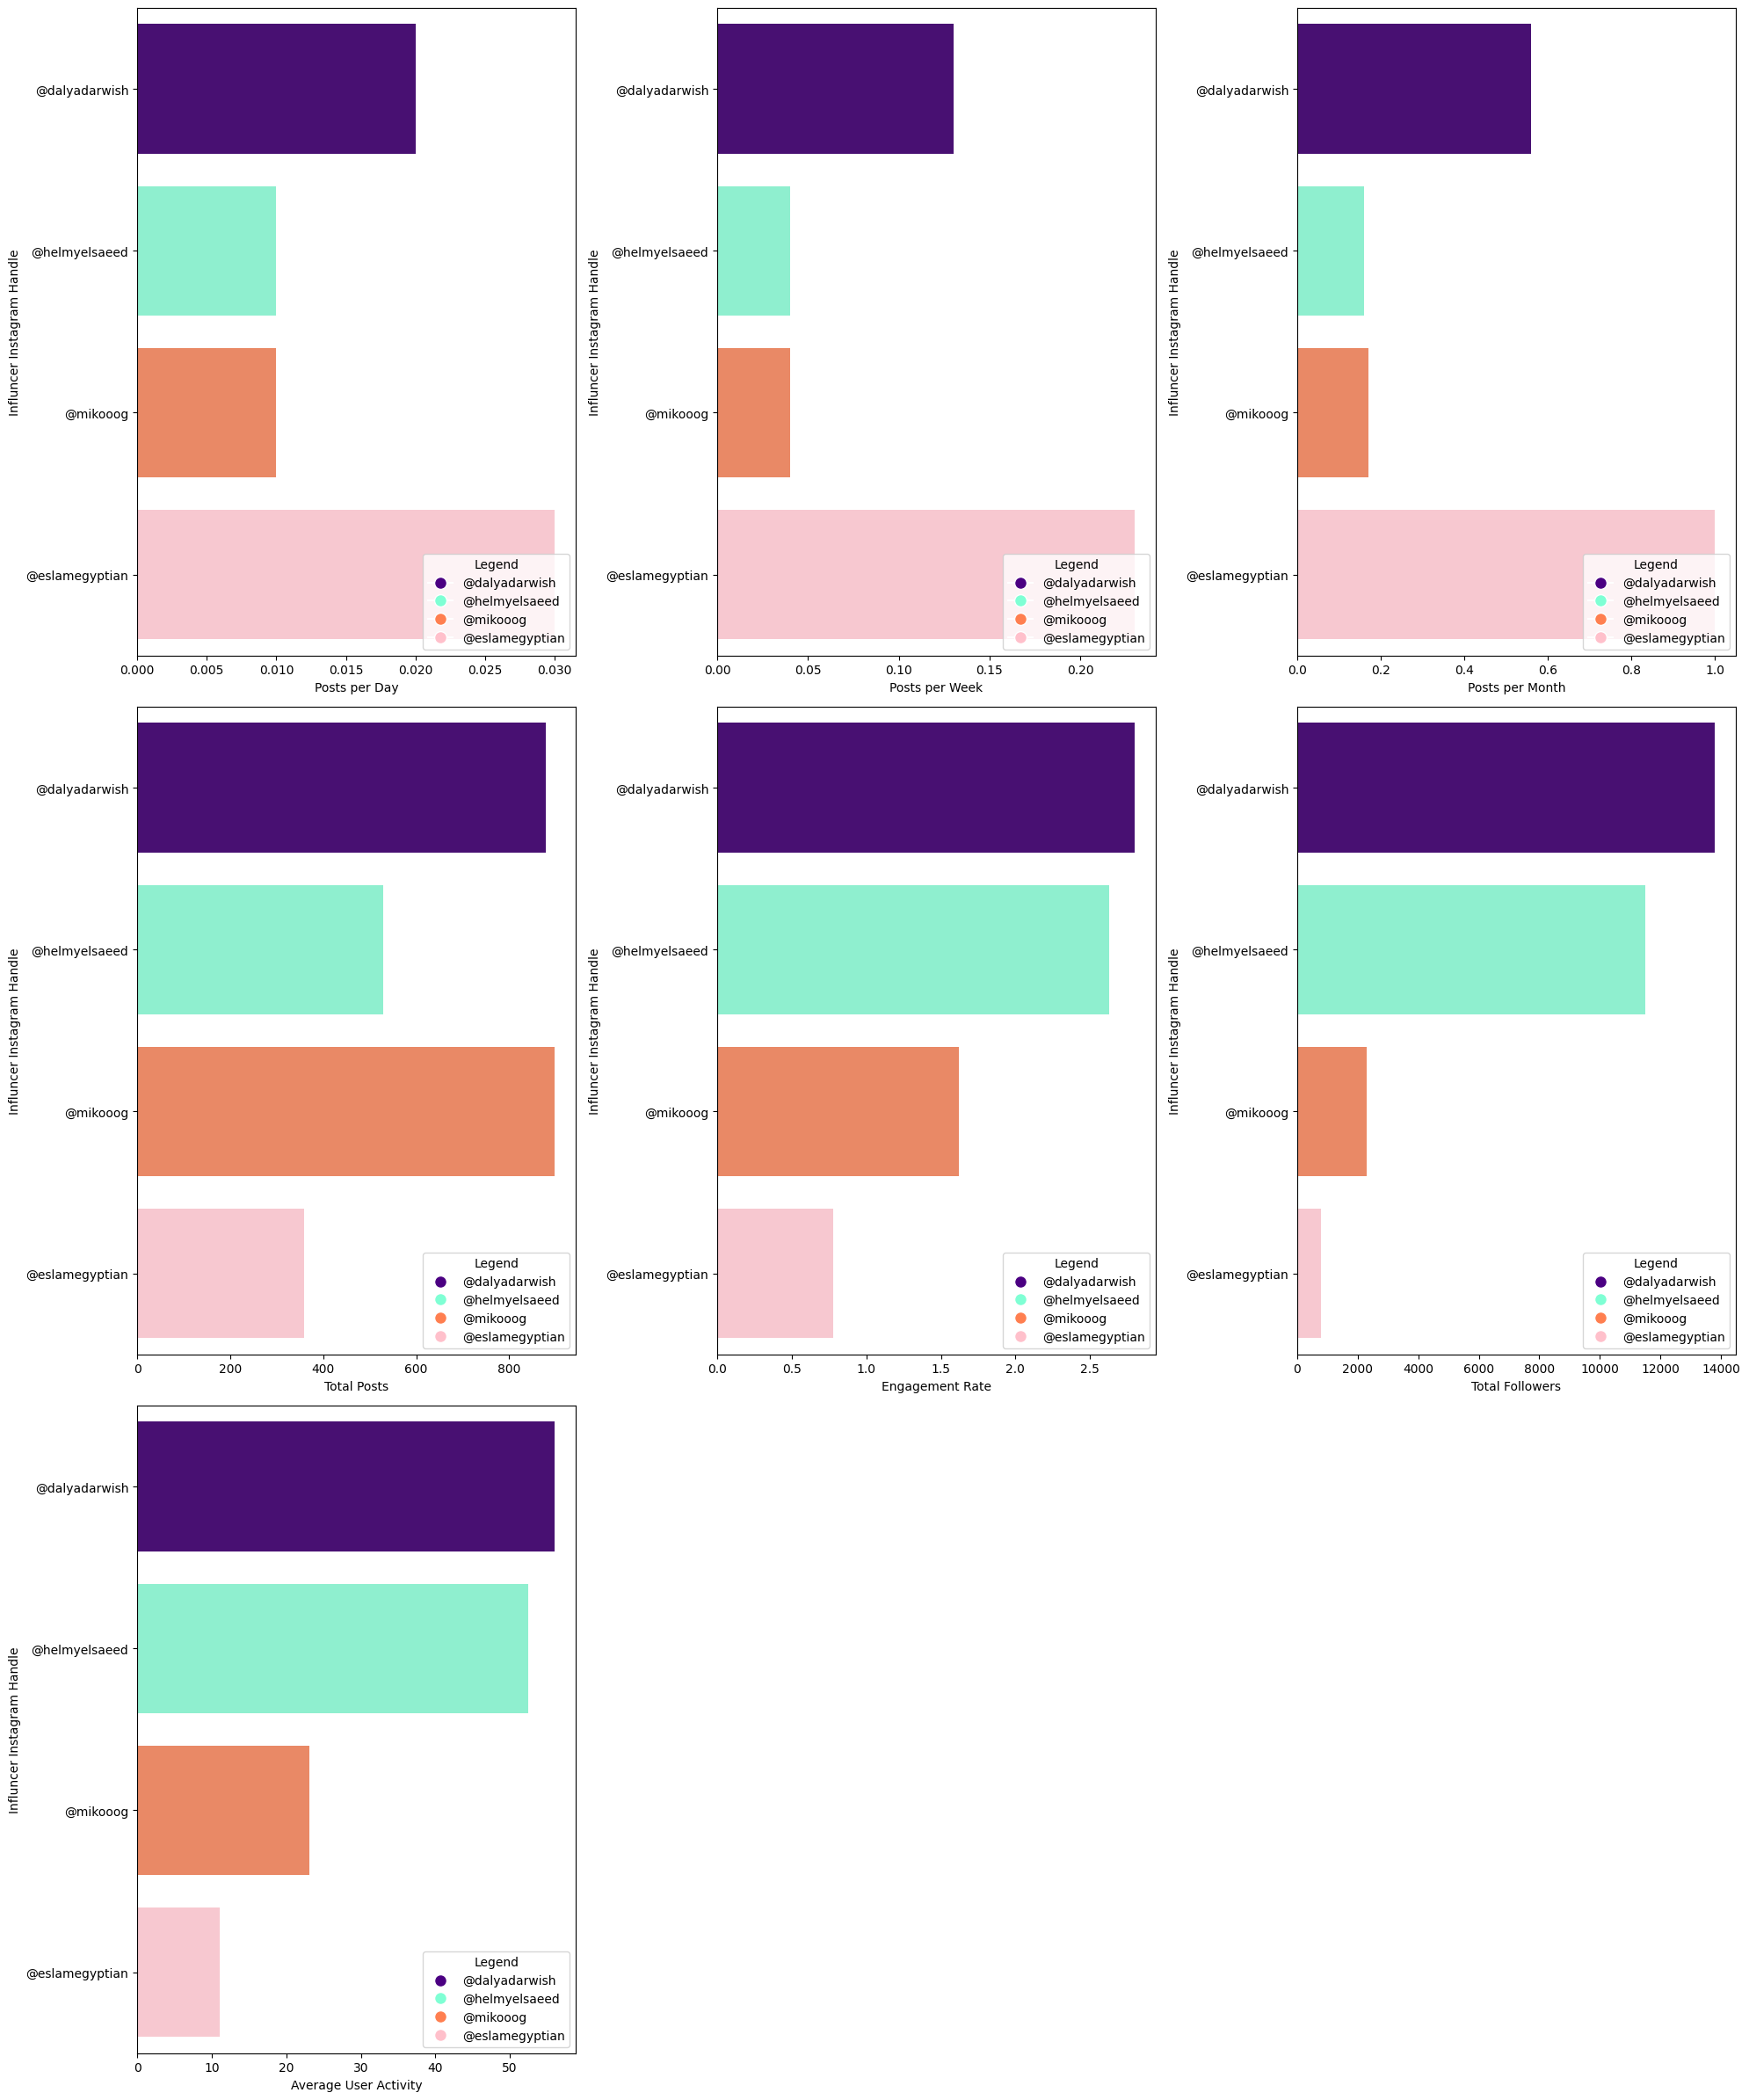

In [266]:
plotter(0,7,df_list[9],'lower right')